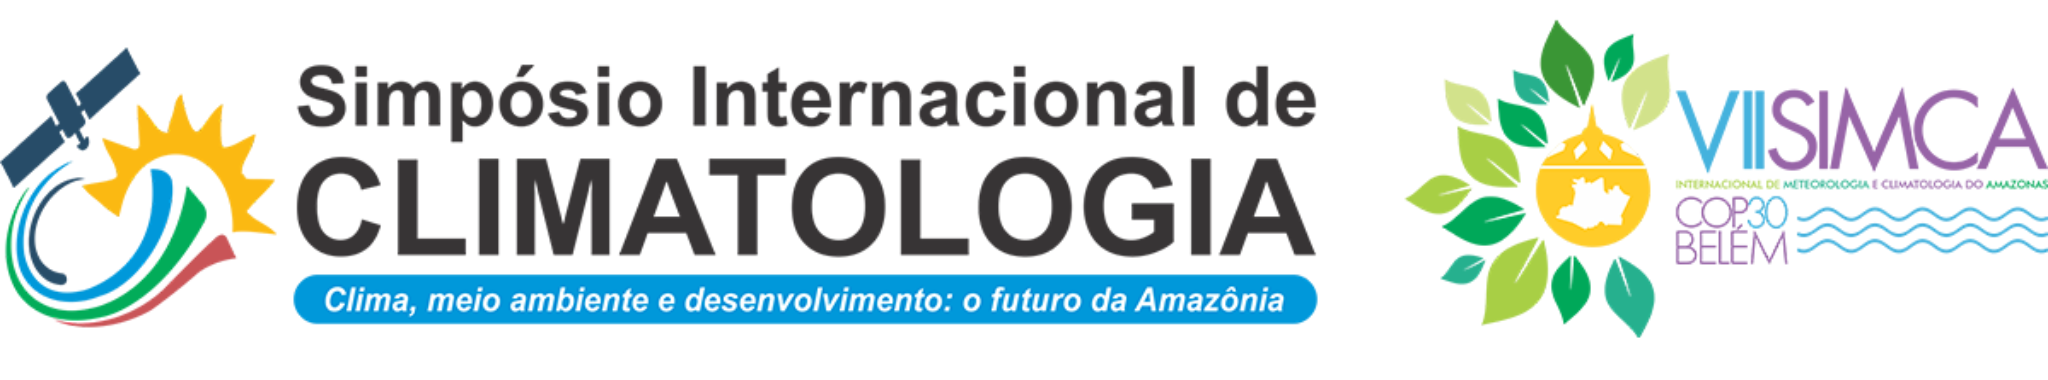

# Minicurso: Processamento de Dados Meteorológicos com Python (PDMP)

Bem-vindos ao minicurso "Processamento de Dados Meteorológicos com Python",
parte da programação do XI Simpósio Internacional de Climatologia (XI SIC 2025)
e VII Seminário Internacional de Meteorologia e Climatologia do Amazonas (VII SIMCA),
em Belém-PA.

Neste notebook, exploraremos um módulo **desenvolvido especificamente para este
evento (XISIC.py)**, que automatiza a extração, o processamento e a conversão de dados
meteorológicos históricos do INMET. O objetivo é facilitar análises científicas e
operacionais, em linha com as discussões sobre clima e sustentabilidade na
Amazônia e a preparação para a COP30.

Esperamos que este material seja útil para suas pesquisas e projetos!



Autores:

  Elivaldo Carvalho Rocha, e

  Prof. Dr. João de Athaydes Silva Júnior

email: carvalhovaldo@gmail.com

## 1) Instalação das Bibliotecas Necessárias

Para que o módulo funcione corretamente, precisamos instalar algumas bibliotecas Python que não vêm por padrão no ambiente. As principais para este minicurso são:

-   **`geobr`**: Utilizada para acessar dados geoespaciais brasileiros, como limites de estados e municípios, o que pode ser útil para visualizações.
-   **`xclim`**: Uma biblioteca poderosa para computar índices de clima, como eventos extremos (ondas de calor, secas, etc.), que usaremos mais adiante.
-   **`pandas` e `xarray`**: Geralmente já vêm pré-instaladas em ambientes como o Colab, mas são a base do nosso processamento de dados.

Execute as células abaixo para instalar as dependências.

In [ ]:
!pip install geobr
!pip install xclim

## 2) Configuração Inicial do Ambiente
Após a instalação das dependências, o próximo passo é importar as bibliotecas que utilizaremos ao longo do notebook. Isso torna suas funcionalidades e classes disponíveis para uso.

In [ ]:
import geobr
import xclim as xc
import pandas as pd
import xarray as xr

## 3) Importando o Módulo do Projeto (XISIC.py)
Neste minicurso, utilizaremos um módulo customizado, XISIC.py, que centraliza todas as funcionalidades para processar os dados do INMET. Ele contém as funções para extração, conversão e depuração que exploraremos.

O código a seguir foi projetado para garantir que o módulo seja importado corretamente, mesmo que o arquivo não esteja no diretório esperado. Ele verifica a existência do arquivo e adiciona o caminho ao ambiente Python para evitar erros.

In [ ]:
# === IMPORTAR MÓDULO XISIC.py ===

import sys
import os

# Verificar o diretório atual
print("Diretório atual:", os.getcwd())
print("Arquivos no diretório:", os.listdir('.'))

# Adicionar o caminho onde está o XISIC.py ao sys.path
# (é como adicionar uma nova estante à biblioteca do Python)
if '/content' not in sys.path:
    sys.path.append('/content')

module_name = 'XISIC.py'

# Verificar se o arquivo existe
xisic_path = f'/content/{module_name}'
if os.path.exists(xisic_path):
    print(f"✅ Arquivo {module_name} encontrado em: {xisic_path}")
else:
    print(f"❌ Arquivo {module_name} NÃO encontrado em: {xisic_path}")
    print("Verificando outros locais...")
    # Procurar o arquivo em outros lugares
    for root, dirs, files in os.walk('/content'):
        if module_name in files:
          print(f"📁 Encontrado em: {root}")

# Agora fazer a importação
try:
    from XISIC import (
        extract_and_save_csvs,
        convert_csvs_to_netcdf,
        parse_inmet_csv_to_netcdf_robust,
        debug_inmet_file,
        CSVExtractionResult,
        NetCDFConversionResult
    )
    print(f"✅ Importação do {module_name[0:-3]} realizada com sucesso!")

    # Testar se as funções estão disponíveis
    print("📋 Funções disponíveis:")
    print("  - extract_and_save_csvs")
    print("  - convert_csvs_to_netcdf")
    print("  - parse_inmet_csv_to_netcdf_robust")
    print("  - debug_inmet_file")

except ImportError as e:
    print(f"❌ Erro na importação: {e}")
    print("\n🔧 Tentando diagnóstico...")

    # Diagnóstico mais detalhado
    try:
        import XISIC
        print("✅ Módulo XISIC importado como objeto")
        print("📋 Atributos disponíveis:", dir(XISIC))
    except Exception as e2:
        print(f"❌ Erro ao importar módulo: {e2}")

Diretório atual: /content
Arquivos no diretório: ['.config', 'XISIC.py', '__pycache__', '2024.zip', '.ipynb_checkpoints', 'INMET_2024', 'sample_data']
✅ Arquivo XISIC.py encontrado em: /content/XISIC.py
✅ Importação do XISIC realizada com sucesso!
📋 Funções disponíveis:
  - extract_and_save_csvs
  - convert_csvs_to_netcdf
  - parse_inmet_csv_to_netcdf_robust
  - debug_inmet_file


### 3.1) Excluir Pasta: /content/INMET_YYYY

onde cada 'Y' representa um dígito do ano

garante que o processamento seja sempre limpo

In [ ]:
import shutil
import os

# Caminho do diretório a ser excluído
diretorio = "/content/INMET_2024"

# Verifica se o diretório existe e remove
if os.path.exists(diretorio):
    shutil.rmtree(diretorio)
    print(f"Diretório {diretorio} foi removido com sucesso!")
else:
    print(f"Diretório {diretorio} não existe.")


Diretório /content/INMET_2024 não existe.


## 4) Extração dos Dados do INMET
Com o nosso módulo importado, podemos dar início ao processamento. O primeiro passo é obter os dados brutos do INMET, que geralmente são fornecidos em arquivos compactados (.zip).

Para garantir que o processamento seja sempre limpo, a célula anterior removeu a pasta de dados de uma execução anterior. Agora, usaremos a função extract_and_save_csvs() do nosso módulo para descompactar o arquivo e organizar os dados em formato CSV, preparando-os para a conversão.

Execute a próxima célula para descompactar os dados do ano de 2024.

In [ ]:
# Processamento de Dados
# tem pode execução: 3 segundos
result = extract_and_save_csvs(zip_path="/content/2024.zip", year=2024)
print(result)

Files extracted to INMET_2024/CSV - Total: 565 files
folder_name='INMET_2024/CSV' success=True message='Files extracted successfully. Total files: 565' file_count=565


## 5) Processamento e Conversão de um Único Arquivo CSV para Entendimento
Nesta seção, realizaremos a conversão de um arquivo CSV de dados brutos do INMET para o formato NetCDF. Utilizaremos a função parse_inmet_csv_to_netcdf_robust(), que é a "espinha dorsal" do nosso módulo para tratar dados faltantes, inconsistências e garantir uma saída robusta e padronizada.

Após a conversão, a célula de código a seguir irá imprimir um resumo detalhado do novo xarray.Dataset. Essa visualização é fundamental para que possamos inspecionar as dimensões, as variáveis, os atributos e as informações geográficas, confirmando que a conversão foi bem-sucedida.

Execute a próxima célula para processar um arquivo e analisar sua estrutura.

In [ ]:
# Processamento de Dados
# tem pode execução: 3minutos e 31 segundos
import pprint
from pprint import pprint as pp

import warnings
warnings.filterwarnings('ignore')

# 3 minutos e 10 segundos
file_path = "/content/INMET_2024/CSV/INMET_CO_DF_A001_BRASILIA_01-01-2024_A_31-12-2024.CSV"

try:
    # Se debug = True, converte com debug ativo
    xarray_dataset = parse_inmet_csv_to_netcdf_robust(
        csv_file_path=file_path,
        debug=False
    )

    print(f"\n🎉 CONVERSÃO CONCLUÍDA COM SUCESSO!")
    print("=" * 60)

    # Usando pprint para formatar melhor a saída
    print("\n📏 DIMENSÕES DO DATASET:")
    print("-" * 30)
    # Converter FrozenMappingWarningOnValuesAccess para dict normal
    dims_dict = dict(xarray_dataset.dims)
    pp(dims_dict, width=50, indent=2)

    print("\n🌡️ VARIÁVEIS METEOROLÓGICAS:")
    print("-" * 40)
    variables_list = list(xarray_dataset.data_vars.keys())

    # Imprimir cada variável em uma linha separada com numeração
    for i, var in enumerate(variables_list, 1):
        print(f"  {i:2d}. {var}")

    print(f"\n📈 FORMATO (pivot_wide): matriz bidimensional (Período × Frequência)")
    print("-" * 25)
    print(f"  • Total de variáveis: {len(variables_list)}")
    print(f"  • Período: {xarray_dataset.sizes['date']} dias")
    print(f"  • Frequência: {xarray_dataset.sizes['hour_utc']} horas/dia")
    print(f"  • Total de registros por variável: {xarray_dataset.sizes['date'] * xarray_dataset.sizes['hour_utc']:,}")

    print(f"\n🗺️ INFORMAÇÕES GEOGRÁFICAS:")
    print("-" * 30)
    attrs_dict = {
        'Estação': xarray_dataset.attrs.get('station', 'N/A'),
        'Região': xarray_dataset.attrs.get('region', 'N/A'),
        'UF': xarray_dataset.attrs.get('uf', 'N/A'),
        'Código WMO': xarray_dataset.attrs.get('wmo_code', 'N/A'),
        'Latitude': f"{xarray_dataset.attrs.get('latitude', 'N/A')}°",
        'Longitude': f"{xarray_dataset.attrs.get('longitude', 'N/A')}°",
        'Altitude': f"{xarray_dataset.attrs.get('altitude_m', 'N/A')} m"
    }
    pp(attrs_dict, width=40, indent=2)

    print(f"\n📅 COORDENADAS TEMPORAIS:")
    print("-" * 28)
    print(f"  • Data inicial: {xarray_dataset.date.values[0]}")
    print(f"  • Data final: {xarray_dataset.date.values[-1]}")

    print(f"\n🔍 ESTRUTURA COMPLETA DO DATASET:")
    print("-" * 38)

    # Mostrar informações das coordenadas de forma organizada
    coords_info = {}
    for coord_name, coord in xarray_dataset.coords.items():
        if coord_name in ['date', 'hour_utc']:
            coords_info[coord_name] = f"shape: {coord.shape}, dtype: {coord.dtype}"
        else:
            coords_info[coord_name] = f"value: {coord.values}, shape: {coord.shape}"

    print("\n  📐 Coordenadas:")
    pp(coords_info, width=60, indent=4)

except Exception as e:
    print(f"❌ Erro: {e}")
    import traceback
    traceback.print_exc()




🎉 CONVERSÃO CONCLUÍDA COM SUCESSO!

📏 DIMENSÕES DO DATASET:
------------------------------
{ 'alt': 1,
  'date': 366,
  'hour_utc': 24,
  'lat': 1,
  'lon': 1,
  'region': 1,
  'uf': 1,
  'wmo_code': 1}

🌡️ VARIÁVEIS METEOROLÓGICAS:
----------------------------------------
   1. PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
   2. PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
   3. PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)
   4. PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
   5. RADIACAO GLOBAL (Kj/m²)
   6. TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)
   7. TEMPERATURA DO PONTO DE ORVALHO (°C)
   8. TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
   9. TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)
  10. TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)
  11. TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)
  12. UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
  13. UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
  14. UMIDADE RELATIVA DO AR, HORARIA (%)
  15. VENTO, DIREÇÃO HORARIA (gr) (° (gr))
  16. 

In [ ]:
print("\n" + "=" * 60)
print("✅ Dataset pronto para análise!")

# Mostrar o dataset (saída padrão do xarray)
print(f"\n📋 VISUALIZAÇÃO XARRAY COMPLETA:")
print("-" * 35)
xarray_dataset


✅ Dataset pronto para análise!

📋 VISUALIZAÇÃO XARRAY COMPLETA:
-----------------------------------


<xarray.Dataset> Size: 1MB
Dimensions:                                                (region: 1, uf: 1,
                                                            wmo_code: 1,
                                                            date: 366,
                                                            hour_utc: 24,
                                                            lat: 1, lon: 1,
                                                            alt: 1)
Coordinates:
  * region                                                 (region) <U2 8B 'CO'
  * uf                                                     (uf) <U2 8B 'DF'
  * wmo_code                                               (wmo_code) <U4 16B ...
  * date                                                   (date) datetime64[ns] 3kB ...
  * hour_utc                                               (hour_utc) int32 96B ...
  * lat                                                    (lat) float64 8B -...
  * lon                                                    (lon) float64 8B -...
  * alt                                                    (alt) float64 8B 1...
Data variables: (12/17)
    PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    RADIACAO GLOBAL (Kj/m²)                                (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    ...                                                     ...
    UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    UMIDADE RELATIVA DO AR, HORARIA (%)                    (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    VENTO, DIREÇÃO HORARIA (gr) (° (gr))                   (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    VENTO, RAJADA MAXIMA (m/s)                             (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    VENTO, VELOCIDADE HORARIA (m/s)                        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
Attributes: (12/13)
    source:              INMET
    station:             BRASILIA
    date_of_foundation:  07/05/00
    title:               Dados meteorológicos horários - BRASILIA
    institution:         Instituto Nacional de Meteorologia (INMET)
    region:              CO
    ...                  ...
    wmo_code:            A001
    latitude:            -15.78944444
    longitude:           -47.92583332
    altitude_m:          1160.96
    creation_date:       2025-08-13 18:42:32
    conventions:         CF-1.8

In [ ]:
# Apenas alguns exemplos de possíveis usos de forma rápida e simples:

# Temperatura máxima do dia
temp_max = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].max(dim='hour_utc')
# temp_max

# Umidade média do dia
umidade_media = xarray_dataset['UMIDADE RELATIVA DO AR, HORARIA (%)'].mean(dim='hour_utc')
# umidade_media

# Dia específico
chuva_01_janeiro = xarray_dataset['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sel(date='2024-01-01').sum()
#chuva_01_janeiro

# Precipitação diária acumulada
precip_diaria = xarray_dataset['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum(dim='hour_utc')
precip_diaria

# e muitas outras análises podem ser realizadas...

<xarray.DataArray 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' (region: 1, uf: 1,
                                                      wmo_code: 1, date: 366,
                                                      lat: 1, lon: 1, alt: 1)> Size: 3kB
array([[[[[[[35.6]]],


          [[[23.2]]],


          [[[48.8]]],


          [[[ 7.6]]],


          [[[ 2.4]]],


          [[[ 0. ]]],


          [[[51.6]]],

...

          [[[ 2. ]]],


          [[[11.2]]],


          [[[ 7.8]]],


          [[[10.4]]],


          [[[19. ]]],


          [[[ 2. ]]],


          [[[ 0. ]]]]]]])
Coordinates:
  * region    (region) <U2 8B 'CO'
  * uf        (uf) <U2 8B 'DF'
  * wmo_code  (wmo_code) <U4 16B 'A001'
  * date      (date) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * lat       (lat) float64 8B -15.79
  * lon       (lon) float64 8B -47.93
  * alt       (alt) float64 8B 1.161e+03

## 6) Algumas Demostrações de Análises e das Vantagens do formato xarray.dataset

### 6.1) ANÁLISE 1: Precipitação Acumulada Mensal

🌡️ ===== ANÁLISE METEOROLÓGICA DE BRASÍLIA 2024 =====
📍 Estação: BRASILIA (A001)
🌍 Região: CO (DF)
🌎 Lat: -15.78944444, Lon: -47.92583332
🌎 Altitude: 1160.96 m
📅 Período: Janeiro a Dezembro de 2024
📊 Análise 1: PRECIPITAÇÃO ACUMULADA MENSAL


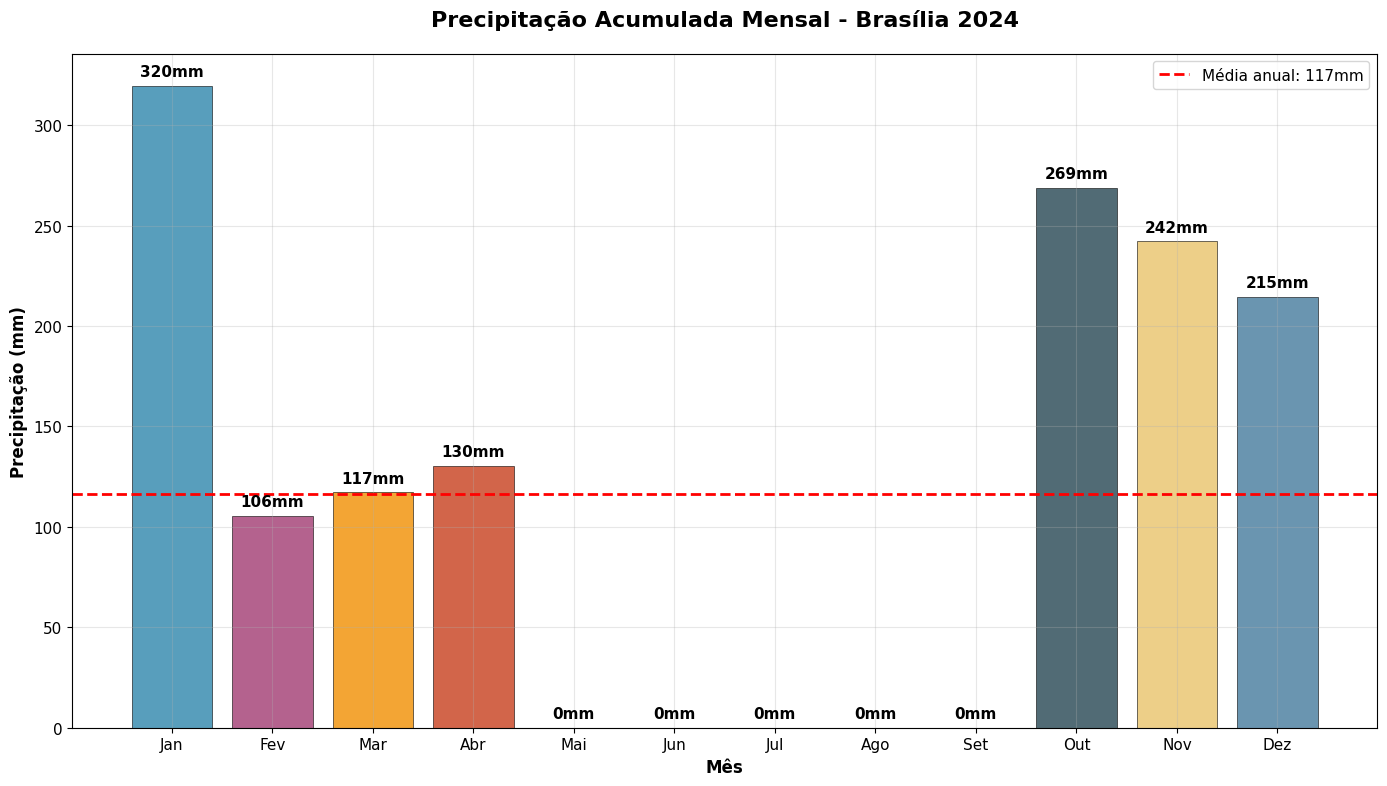

💧 Total anual: 1399 mm
🌧️  Mês mais chuvoso: Jan (320 mm)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.dates as mdates

# ===== CONFIGURAÇÕES INICIAIS =====
# Assumindo que xarray_dataset já está carregado

# Configurar matplotlib para gráficos em português
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True

dict_attrs = xarray_dataset.attrs

print("🌡️ ===== ANÁLISE METEOROLÓGICA DE BRASÍLIA 2024 =====")
print(f"📍 Estação: {dict_attrs['station']} ({dict_attrs['wmo_code']})")
print(f"🌍 Região: {dict_attrs['region']} ({dict_attrs['uf']})")
print(f"🌎 Lat: {dict_attrs['latitude']}, Lon: {dict_attrs['longitude']}")
print(f"🌎 Altitude: {dict_attrs['altitude_m']} m")
print("📅 Período: Janeiro a Dezembro de 2024")

#🔄 Usando paradigma IMPERATIVO/PROCEDURAL

# ===== ANÁLISE 1: PRECIPITAÇÃO ACUMULADA MENSAL =====
print("📊 Análise 1: PRECIPITAÇÃO ACUMULADA MENSAL")

# Calcular precipitação diária
precip_diaria = xarray_dataset['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum(dim='hour_utc')

# Remover dimensões extras
precip_diaria = precip_diaria.squeeze()

# Agrupar por mês
precip_mensal = precip_diaria.groupby('date.month').sum()

# Extrair valores
meses_nums = precip_mensal.month.values
precip_valores = precip_mensal.values

# Nomes dos meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criar gráfico de barras
plt.figure(figsize=(14, 8))
cores = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5E4B99', '#2F9B69',
         '#8E5572', '#F4A261', '#E76F51', '#264653', '#E9C46A', '#457B9D']

barras = plt.bar(range(len(meses_nums)), precip_valores, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)

# Personalizar gráfico
plt.title('Precipitação Acumulada Mensal - Brasília 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12, fontweight='bold')
plt.ylabel('Precipitação (mm)', fontsize=12, fontweight='bold')
plt.xticks(range(len(meses_nums)), [nomes_meses[i-1] for i in meses_nums])

# Adicionar valores nas barras
for i, v in enumerate(precip_valores):
    plt.text(i, v + max(precip_valores)*0.01, f'{v:.0f}mm',
             ha='center', va='bottom', fontweight='bold')

# Adicionar linha da média anual
media_mensal = np.mean(precip_valores)
plt.axhline(y=media_mensal, color='red', linestyle='--', linewidth=2,
            label=f'Média anual: {media_mensal:.0f}mm')

plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# Imprimir estatísticas
total_anual = np.sum(precip_valores)
mes_mais_chuvoso_idx = np.argmax(precip_valores)
mes_mais_seco_idx = np.argmin(precip_valores)

print(f"💧 Total anual: {total_anual:.0f} mm")
print(f"🌧️  Mês mais chuvoso: {nomes_meses[meses_nums[mes_mais_chuvoso_idx]-1]} ({precip_valores[mes_mais_chuvoso_idx]:.0f} mm)")


### 6.2) ANÁLISE 2: TEMPERATURA MÉDIA MENSAL E AMPLITUDE TÉRMICA


📊 Análise 2: TEMPERATURA MÉDIA MENSAL E AMPLITUDE TÉRMICA


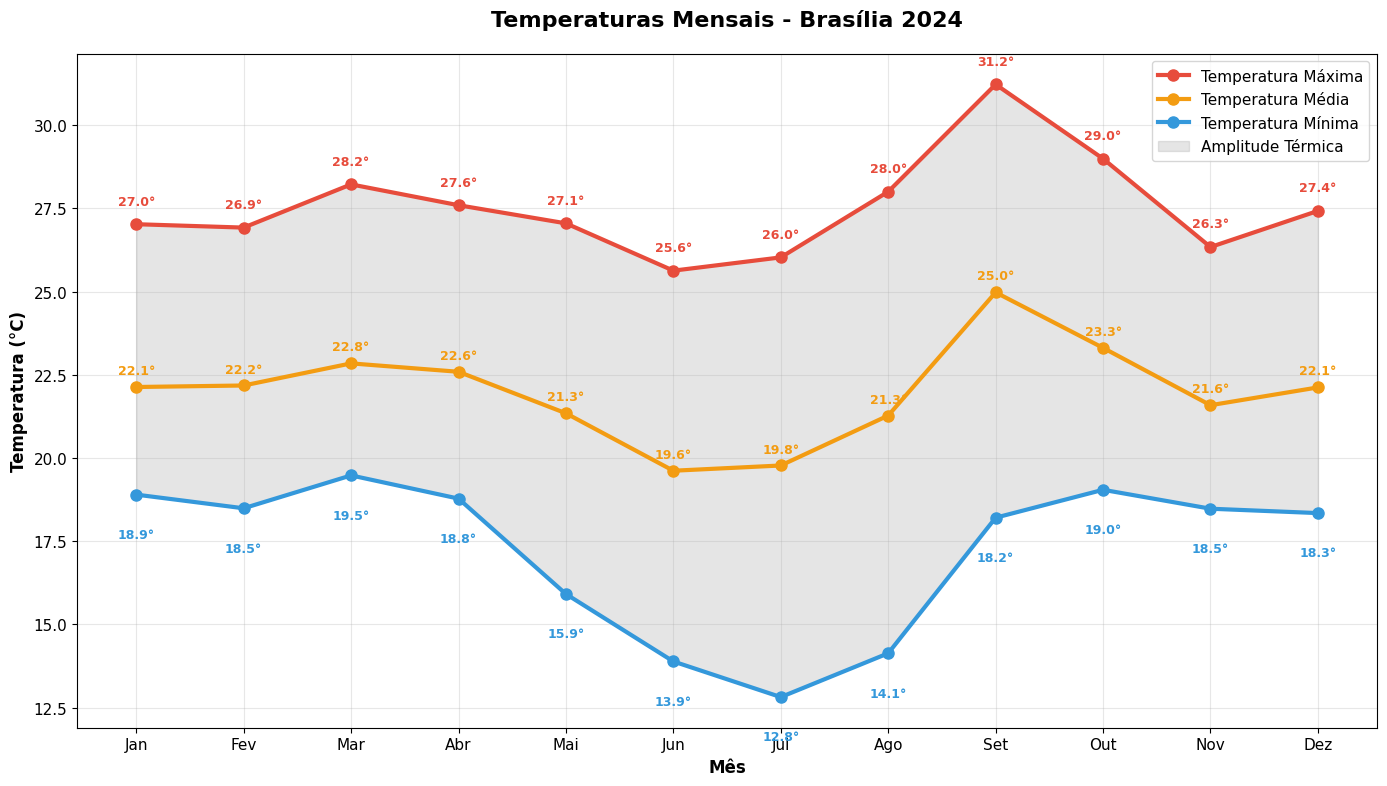

🌡️  Maior amplitude térmica: Ago (13.9°C)
🌡️  Menor amplitude térmica: Nov (7.9°C)

🌡️ ANÁLISE CLIMATOLÓGICA DETALHADA:
   🌞 Verão (Dez-Jan-Fev): 22.1°C
   🍂 Outono (Mar-Abr-Mai): 22.3°C
   ❄️  Inverno (Jun-Jul-Ago): 20.2°C
   🌸 Primavera (Set-Out-Nov): 23.3°C
   🔄 Variação sazonal: 3.1°C

🔥 Mês mais quente: Set (25.0°C)
🧊 Mês mais frio: Jun (19.6°C)
🌡️  Diferença anual: 5.4°C

📊 AMPLITUDE TÉRMICA:
   📈 Amplitude média anual: 10.3°C
   📈 Amplitude máxima: 13.9°C (Ago)
   📉 Amplitude mínima: 7.9°C (Nov)

🎯 INTERPRETAÇÃO CLIMATOLÓGICA:
✅ Padrão típico do clima tropical de altitude do Cerrado:
   • Duas estações bem definidas: seca (maio-setembro) e chuvosa (outubro-abril)
   • Temperaturas mais baixas no inverno seco (junho-agosto)
   • Maior amplitude térmica na estação seca (ar mais seco)
   • Temperaturas mais estáveis na estação chuvosa (maior umidade)
   • Alta amplitude térmica típica do Planalto Central brasileiro


In [ ]:
# ===== ANÁLISE 2: TEMPERATURA MÉDIA MENSAL E AMPLITUDE TÉRMICA =====
print(f"\n📊 Análise 2: TEMPERATURA MÉDIA MENSAL E AMPLITUDE TÉRMICA")

# Calcular temperaturas diárias
temp_max_diaria = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].max(dim='hour_utc').squeeze()
temp_min_diaria = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].min(dim='hour_utc').squeeze()
temp_media_diaria = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean(dim='hour_utc').squeeze()

# Agrupar por mês
temp_max_mensal = temp_max_diaria.groupby('date.month').mean()
temp_min_mensal = temp_min_diaria.groupby('date.month').mean()
temp_media_mensal = temp_media_diaria.groupby('date.month').mean()

# Extrair valores
meses_nums = temp_max_mensal.month.values
temp_max_vals = temp_max_mensal.values
temp_min_vals = temp_min_mensal.values
temp_media_vals = temp_media_mensal.values

# Nomes dos meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criar gráfico de temperatura
plt.figure(figsize=(14, 8))

# Plotar as três séries (SEM conflito de cores)
x_pos = range(len(meses_nums))
plt.plot(x_pos, temp_max_vals, 'o-', linewidth=3, markersize=8,
         label='Temperatura Máxima', color='#E74C3C')
plt.plot(x_pos, temp_media_vals, 'o-', linewidth=3, markersize=8,
         label='Temperatura Média', color='#F39C12')
plt.plot(x_pos, temp_min_vals, 'o-', linewidth=3, markersize=8,
         label='Temperatura Mínima', color='#3498DB')

# Preencher área entre máxima e mínima
plt.fill_between(x_pos, temp_max_vals, temp_min_vals, alpha=0.2,
                color='gray', label='Amplitude Térmica')

# Personalizar gráfico
plt.title('Temperaturas Mensais - Brasília 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura (°C)', fontsize=12, fontweight='bold')
plt.xticks(x_pos, [nomes_meses[i-1] for i in meses_nums])

# Adicionar valores nas linhas
for i in range(len(x_pos)):
    plt.text(i, temp_max_vals[i] + 0.5, f'{temp_max_vals[i]:.1f}°',
             ha='center', va='bottom', fontsize=9, color='#E74C3C', fontweight='bold')
    plt.text(i, temp_media_vals[i] + 0.3, f'{temp_media_vals[i]:.1f}°',
             ha='center', va='bottom', fontsize=9, color='#F39C12', fontweight='bold')
    plt.text(i, temp_min_vals[i] - 1, f'{temp_min_vals[i]:.1f}°',
             ha='center', va='top', fontsize=9, color='#3498DB', fontweight='bold')

plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular amplitude térmica mensal
amplitude_termica = temp_max_vals - temp_min_vals
mes_maior_amplitude = np.argmax(amplitude_termica)
mes_menor_amplitude = np.argmin(amplitude_termica)

print(f"🌡️  Maior amplitude térmica: {nomes_meses[meses_nums[mes_maior_amplitude]-1]} ({amplitude_termica[mes_maior_amplitude]:.1f}°C)")
print(f"🌡️  Menor amplitude térmica: {nomes_meses[meses_nums[mes_menor_amplitude]-1]} ({amplitude_termica[mes_menor_amplitude]:.1f}°C)")

# Análise detalhada do padrão climático
print(f"\n🌡️ ANÁLISE CLIMATOLÓGICA DETALHADA:")

# Identificar estações do ano
temp_verao = np.mean([temp_media_vals[0], temp_media_vals[1], temp_media_vals[11]])  # Dez, Jan, Fev
temp_outono = np.mean([temp_media_vals[2], temp_media_vals[3], temp_media_vals[4]])   # Mar, Abr, Mai
temp_inverno = np.mean([temp_media_vals[5], temp_media_vals[6], temp_media_vals[7]]) # Jun, Jul, Ago
temp_primavera = np.mean([temp_media_vals[8], temp_media_vals[9], temp_media_vals[10]]) # Set, Out, Nov

print(f"   🌞 Verão (Dez-Jan-Fev): {temp_verao:.1f}°C")
print(f"   🍂 Outono (Mar-Abr-Mai): {temp_outono:.1f}°C")
print(f"   ❄️  Inverno (Jun-Jul-Ago): {temp_inverno:.1f}°C")
print(f"   🌸 Primavera (Set-Out-Nov): {temp_primavera:.1f}°C")

# Diferença sazonal
variacao_sazonal = max(temp_verao, temp_outono, temp_inverno, temp_primavera) - \
                   min(temp_verao, temp_outono, temp_inverno, temp_primavera)
print(f"   🔄 Variação sazonal: {variacao_sazonal:.1f}°C")

# Identificar meses extremos
mes_mais_quente = nomes_meses[meses_nums[np.argmax(temp_media_vals)]-1]
mes_mais_frio = nomes_meses[meses_nums[np.argmin(temp_media_vals)]-1]
temp_mais_alta = np.max(temp_media_vals)
temp_mais_baixa = np.min(temp_media_vals)

print(f"\n🔥 Mês mais quente: {mes_mais_quente} ({temp_mais_alta:.1f}°C)")
print(f"🧊 Mês mais frio: {mes_mais_frio} ({temp_mais_baixa:.1f}°C)")
print(f"🌡️  Diferença anual: {temp_mais_alta - temp_mais_baixa:.1f}°C")

# Análise da amplitude térmica
amplitude_media = np.mean(amplitude_termica)
print(f"\n📊 AMPLITUDE TÉRMICA:")
print(f"   📈 Amplitude média anual: {amplitude_media:.1f}°C")
print(f"   📈 Amplitude máxima: {np.max(amplitude_termica):.1f}°C ({nomes_meses[meses_nums[mes_maior_amplitude]-1]})")
print(f"   📉 Amplitude mínima: {np.min(amplitude_termica):.1f}°C ({nomes_meses[meses_nums[mes_menor_amplitude]-1]})")

# Interpretação climatológica
print(f"\n🎯 INTERPRETAÇÃO CLIMATOLÓGICA:")
print("✅ Padrão típico do clima tropical de altitude do Cerrado:")
print("   • Duas estações bem definidas: seca (maio-setembro) e chuvosa (outubro-abril)")
print("   • Temperaturas mais baixas no inverno seco (junho-agosto)")
print("   • Maior amplitude térmica na estação seca (ar mais seco)")
print("   • Temperaturas mais estáveis na estação chuvosa (maior umidade)")

if amplitude_termica[mes_maior_amplitude] > 12:
    print("   • Alta amplitude térmica típica do Planalto Central brasileiro")
else:
    print("   • Amplitude térmica moderada para a região do Cerrado")


### 6.3) ANÁLISE 3: CICLO DIÁRIO DE TEMPERATURA COM HORÁRIO LOCAL


📊 Análise 3: CICLO DIÁRIO DE TEMPERATURA (MÉDIAS HORÁRIAS ANUAIS)


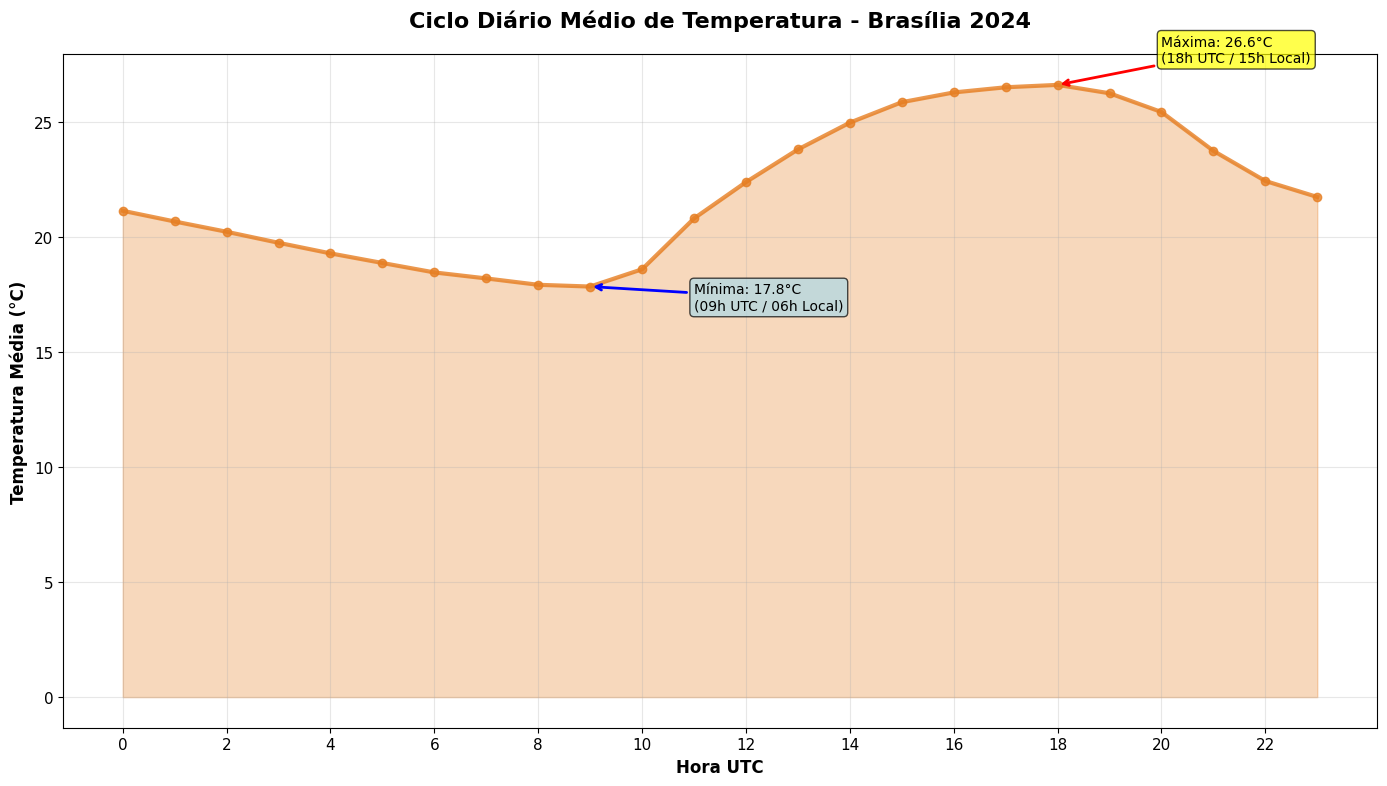

🌅 Temperatura mínima ocorre às 09h UTC (06h Local - Brasília) - 17.8°C
🌇 Temperatura máxima ocorre às 18h UTC (15h Local - Brasília) - 26.6°C
🔄 Amplitude diária média: 8.8°C

⏰ ANÁLISE DO PADRÃO HORÁRIO:
🌙 Madrugada mais fria: 06h (horário local)
☀️ Tarde mais quente: 15h (horário local)

🕐 TEMPERATURAS EM HORÁRIOS ESPECÍFICOS (Horário de Brasília):
   06h: 17.8°C (nascer do sol)
   12h: 25.8°C (meio-dia)
   18h: 23.7°C (final da tarde)
   00h: 19.7°C (meia-noite)

📈 DINÂMICA TÉRMICA:
   ⬆️ Taxa de aquecimento: 0.97°C/hora
   ⬇️ Taxa de resfriamento: 0.58°C/hora

🎯 INTERPRETAÇÃO DO CICLO DIÁRIO:
✅ Padrão típico do clima tropical continental:
   • Mínima ocorre no final da madrugada (padrão normal)
   • Máxima ocorre no meio da tarde (padrão normal)
   • Alta amplitude diária típica do Cerrado (ar seco)
   • Aquecimento durante 9 horas
   • Resfriamento durante 15 horas

🌡️ CONTEXTO LOCAL:
   • Brasília está no fuso UTC-3 (horário oficial do Brasil)
   • Altitude de 1.161m influencia as

In [ ]:
# ===== ANÁLISE 3: CICLO DIÁRIO DE TEMPERATURA COM HORÁRIO LOCAL =====
print(f"\n📊 Análise 3: CICLO DIÁRIO DE TEMPERATURA (MÉDIAS HORÁRIAS ANUAIS)")

# Calcular temperatura média para cada hora do dia ao longo do ano
temp_horaria_anual = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean(dim='date').squeeze()

# Extrair valores
horas = temp_horaria_anual.hour_utc.values
temp_horaria_vals = temp_horaria_anual.values

# Função para converter UTC para horário local de Brasília (UTC-3)
def utc_para_brasilia(hora_utc):
    hora_local = hora_utc - 3
    if hora_local < 0:
        hora_local += 24
    return hora_local

# Criar gráfico do ciclo diário
plt.figure(figsize=(14, 8))

plt.plot(horas, temp_horaria_vals, 'o-', linewidth=3, markersize=6, color='#E67E22', alpha=0.8)
plt.fill_between(horas, temp_horaria_vals, alpha=0.3, color='#E67E22')

# Personalizar gráfico
plt.title('Ciclo Diário Médio de Temperatura - Brasília 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hora UTC', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura Média (°C)', fontsize=12, fontweight='bold')
plt.xticks(range(0, 24, 2))

# Marcar temperaturas máxima e mínima do dia
hora_max = horas[np.argmax(temp_horaria_vals)]
hora_min = horas[np.argmin(temp_horaria_vals)]
temp_max_dia = np.max(temp_horaria_vals)
temp_min_dia = np.min(temp_horaria_vals)

# Converter para horário local
hora_max_local = utc_para_brasilia(hora_max)
hora_min_local = utc_para_brasilia(hora_min)

plt.annotate(f'Máxima: {temp_max_dia:.1f}°C\n({hora_max:02d}h UTC / {hora_max_local:02d}h Local)',
             xy=(hora_max, temp_max_dia), xytext=(hora_max+2, temp_max_dia+1),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='left', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.annotate(f'Mínima: {temp_min_dia:.1f}°C\n({hora_min:02d}h UTC / {hora_min_local:02d}h Local)',
             xy=(hora_min, temp_min_dia), xytext=(hora_min+2, temp_min_dia-1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2),
             fontsize=10, ha='left', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🌅 Temperatura mínima ocorre às {hora_min:02d}h UTC ({hora_min_local:02d}h Local - Brasília) - {temp_min_dia:.1f}°C")
print(f"🌇 Temperatura máxima ocorre às {hora_max:02d}h UTC ({hora_max_local:02d}h Local - Brasília) - {temp_max_dia:.1f}°C")
print(f"🔄 Amplitude diária média: {temp_max_dia - temp_min_dia:.1f}°C")

# Análise adicional do padrão horário
print(f"\n⏰ ANÁLISE DO PADRÃO HORÁRIO:")
print(f"🌙 Madrugada mais fria: {hora_min_local:02d}h (horário local)")
print(f"☀️ Tarde mais quente: {hora_max_local:02d}h (horário local)")

# Identificar horários específicos em Brasília
temp_06h_local = temp_horaria_vals[9]   # 09h UTC = 06h Local
temp_12h_local = temp_horaria_vals[15]  # 15h UTC = 12h Local
temp_18h_local = temp_horaria_vals[21]  # 21h UTC = 18h Local
temp_00h_local = temp_horaria_vals[3]   # 03h UTC = 00h Local

print(f"\n🕐 TEMPERATURAS EM HORÁRIOS ESPECÍFICOS (Horário de Brasília):")
print(f"   06h: {temp_06h_local:.1f}°C (nascer do sol)")
print(f"   12h: {temp_12h_local:.1f}°C (meio-dia)")
print(f"   18h: {temp_18h_local:.1f}°C (final da tarde)")
print(f"   00h: {temp_00h_local:.1f}°C (meia-noite)")

# Calcular taxa de aquecimento e resfriamento
horas_aquecimento = hora_max - hora_min
if horas_aquecimento < 0:
    horas_aquecimento += 24

taxa_aquecimento = (temp_max_dia - temp_min_dia) / horas_aquecimento
taxa_resfriamento = (temp_max_dia - temp_min_dia) / (24 - horas_aquecimento)

print(f"\n📈 DINÂMICA TÉRMICA:")
print(f"   ⬆️ Taxa de aquecimento: {taxa_aquecimento:.2f}°C/hora")
print(f"   ⬇️ Taxa de resfriamento: {taxa_resfriamento:.2f}°C/hora")

# Interpretação climatológica
print(f"\n🎯 INTERPRETAÇÃO DO CICLO DIÁRIO:")
print("✅ Padrão típico do clima tropical continental:")

if hora_min_local >= 5 and hora_min_local <= 7:
    print("   • Mínima ocorre no final da madrugada (padrão normal)")
else:
    print(f"   • Mínima às {hora_min_local:02d}h é atípica para clima tropical")

if hora_max_local >= 14 and hora_max_local <= 16:
    print("   • Máxima ocorre no meio da tarde (padrão normal)")
else:
    print(f"   • Máxima às {hora_max_local:02d}h é atípica para clima tropical")

if temp_max_dia - temp_min_dia > 8:
    print("   • Alta amplitude diária típica do Cerrado (ar seco)")
else:
    print("   • Amplitude diária moderada")

print(f"   • Aquecimento durante {horas_aquecimento:.0f} horas")
print(f"   • Resfriamento durante {24-horas_aquecimento:.0f} horas")

print(f"\n🌡️ CONTEXTO LOCAL:")
print("   • Brasília está no fuso UTC-3 (horário oficial do Brasil)")
print("   • Altitude de 1.161m influencia as temperaturas noturnas")
print("   • Latitude 15°S resulta em variação sazonal moderada")

### 6.4) ANÁLISE 4: RELAÇÃO TEMPERATURA x UMIDADE


📊 Análise 4: RELAÇÃO TEMPERATURA x UMIDADE


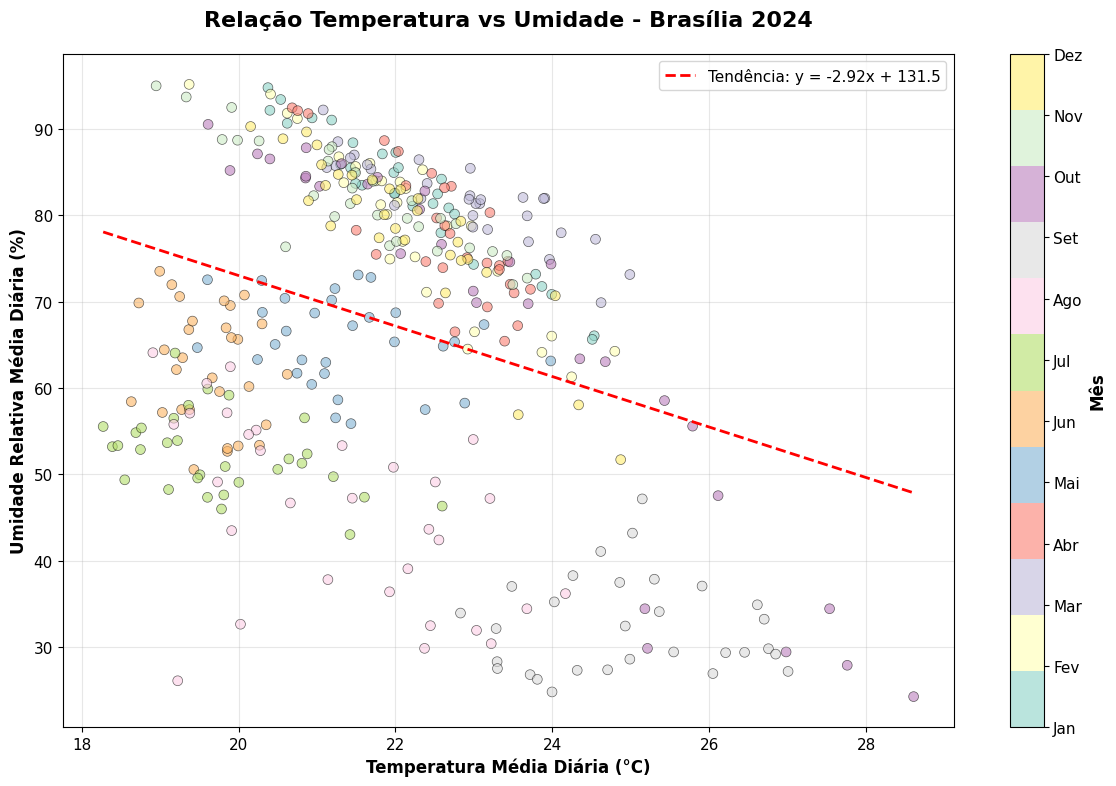

📈 Correlação temperatura-umidade: -0.304
🔍 Correlação negativa moderada: relação inversa entre temperatura e umidade


In [ ]:
# ===== ANÁLISE 4: RELAÇÃO TEMPERATURA x UMIDADE =====
print(f"\n📊 Análise 4: RELAÇÃO TEMPERATURA x UMIDADE")

# Calcular médias diárias
temp_media_daily = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean(dim='hour_utc').squeeze()
umidade_media_daily = xarray_dataset['UMIDADE RELATIVA DO AR, HORARIA (%)'].mean(dim='hour_utc').squeeze()

# Extrair valores
temp_vals = temp_media_daily.values
umidade_vals = umidade_media_daily.values

# Remover valores NaN
mask_validos = ~(np.isnan(temp_vals) | np.isnan(umidade_vals))
temp_limpo = temp_vals[mask_validos]
umidade_limpo = umidade_vals[mask_validos]

# Criar gráfico de dispersão
plt.figure(figsize=(12, 8))

# Colorir pontos por mês
datas_limpas = temp_media_daily.date.values[mask_validos]
meses_pontos = pd.to_datetime(datas_limpas).month

scatter = plt.scatter(temp_limpo, umidade_limpo, c=meses_pontos, cmap='Set3',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Adicionar linha de tendência
coeficientes = np.polyfit(temp_limpo, umidade_limpo, 1)
linha_tendencia = np.poly1d(coeficientes)
x_tendencia = np.linspace(min(temp_limpo), max(temp_limpo), 100)
y_tendencia = linha_tendencia(x_tendencia)
plt.plot(x_tendencia, y_tendencia, 'r--', linewidth=2, label=f'Tendência: y = {coeficientes[0]:.2f}x + {coeficientes[1]:.1f}')

# Personalizar gráfico
plt.title('Relação Temperatura vs Umidade - Brasília 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Temperatura Média Diária (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Umidade Relativa Média Diária (%)', fontsize=12, fontweight='bold')

# Adicionar colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Mês', fontsize=12, fontweight='bold')
cbar.set_ticks(range(1, 13))
cbar.set_ticklabels(nomes_meses)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular correlação
correlacao = np.corrcoef(temp_limpo, umidade_limpo)[0, 1]
print(f"📈 Correlação temperatura-umidade: {correlacao:.3f}")

if correlacao < -0.5:
    print("🔍 Correlação negativa forte: quando temperatura sobe, umidade tende a diminuir")
elif correlacao < -0.3:
    print("🔍 Correlação negativa moderada: relação inversa entre temperatura e umidade")
elif correlacao > 0.5:
    print("🔍 Correlação positiva forte: temperatura e umidade variam juntas")
else:
    print("🔍 Correlação fraca: pouca relação linear entre temperatura e umidade")



### 6.5) ANÁLISE 5: ROSE CHART DOS VENTOS


📊 Análise 5: ROSA DOS VENTOS - NORTE NA VERTICAL


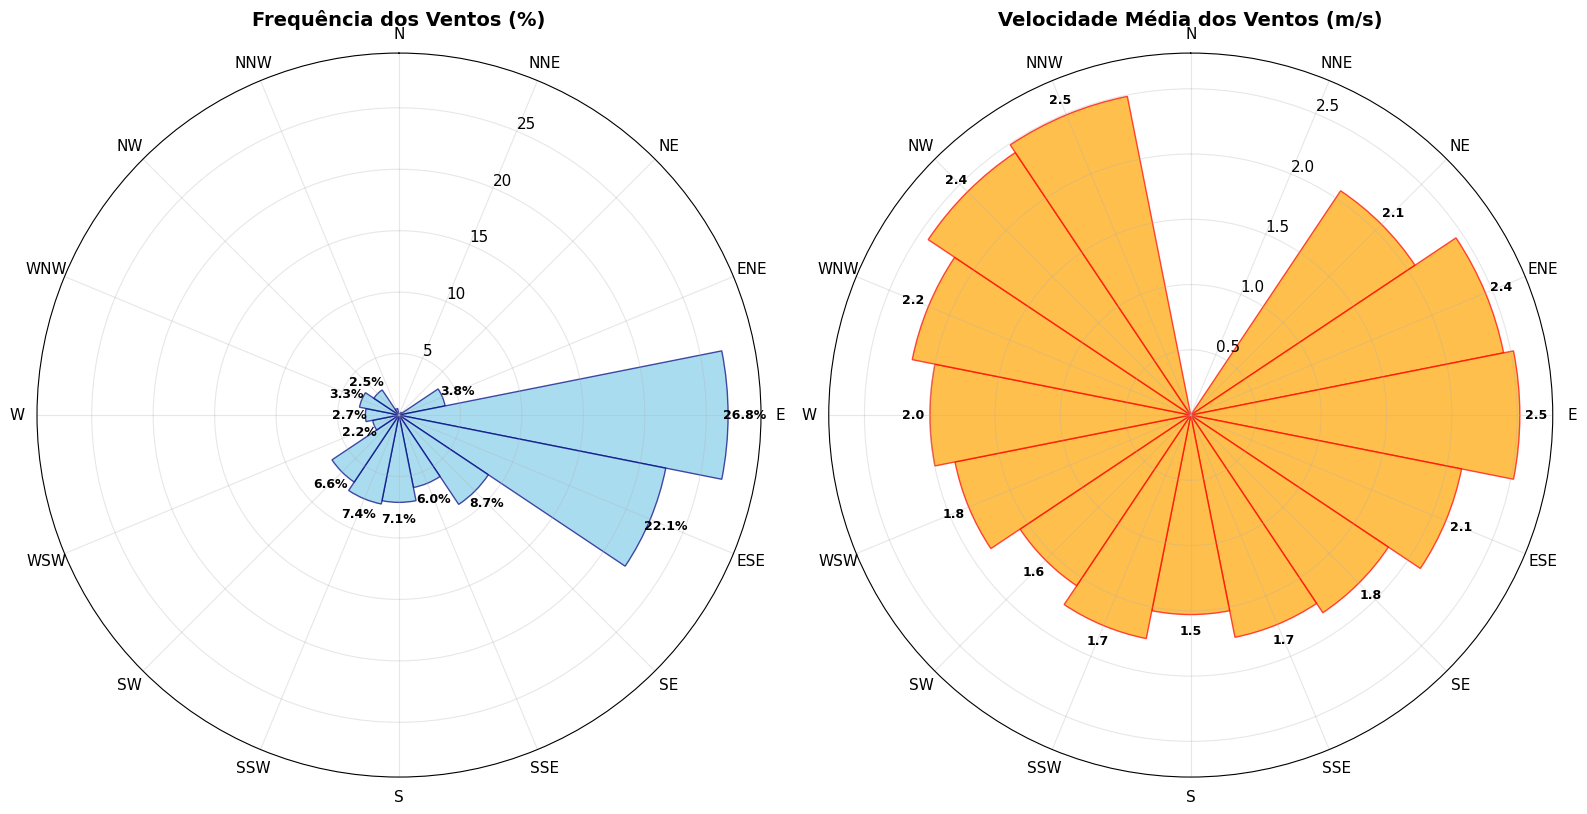

🧭 Direção predominante: E (26.8% do tempo)
💨 Velocidade média nesta direção: 2.5 m/s
🌪️  Velocidade média geral dos ventos: 2.1 m/s

📊 DISTRIBUIÇÃO DETALHADA DOS VENTOS:
Direção  | Frequência | Vel. Média
-----------------------------------
NE       |      0.3% |      2.1 m/s
ENE      |      3.8% |      2.4 m/s
E        |     26.8% |      2.5 m/s
ESE      |     22.1% |      2.1 m/s
SE       |      8.7% |      1.8 m/s
SSE      |      6.0% |      1.7 m/s
S        |      7.1% |      1.5 m/s
SSW      |      7.4% |      1.7 m/s
SW       |      6.6% |      1.6 m/s
WSW      |      2.2% |      1.8 m/s
W        |      2.7% |      2.0 m/s
WNW      |      3.3% |      2.2 m/s
NW       |      2.5% |      2.4 m/s
NNW      |      0.5% |      2.5 m/s

🧭 ANÁLISE POR QUADRANTES:
Norte:  0.5%
Leste:  53.0%
Sul:    29.2%
Oeste:  17.2%

🎯 Quadrante predominante: Leste

✅ Rosa dos ventos corrigida com Norte perfeitamente vertical!


In [ ]:
# ===== ANÁLISE 5: ROSE CHART DOS VENTOS =====
print(f"\n📊 Análise 5: ROSA DOS VENTOS - NORTE NA VERTICAL")

# Calcular direção e velocidade médias diárias do vento
direcao_vento = xarray_dataset['VENTO, DIREÇÃO HORARIA (gr) (° (gr))'].mean(dim='hour_utc').squeeze()
velocidade_vento = xarray_dataset['VENTO, VELOCIDADE HORARIA (m/s)'].mean(dim='hour_utc').squeeze()

# Extrair valores válidos
direcao_vals = direcao_vento.values
velocidade_vals = velocidade_vento.values

# Remover NaN
mask_vento_valido = ~(np.isnan(direcao_vals) | np.isnan(velocidade_vals))
direcao_limpa = direcao_vals[mask_vento_valido]
velocidade_limpa = velocidade_vals[mask_vento_valido]

# Criar bins de direção (16 direções)
# Bins centrados nas direções cardeais e colaterais
bins_direcao = np.arange(-11.25, 360-11.25+1, 22.5)  # Começar em -11.25 para centralizar o Norte
indices_bins = np.digitize(direcao_limpa, bins_direcao) - 1

# Tratar o caso especial onde direções próximas a 360° são mapeadas para o primeiro bin (Norte)
indices_bins[indices_bins == 16] = 0  # Direções > 348.75° são Norte
indices_bins[indices_bins == -1] = 0  # Direções < 11.25° também são Norte

# Calcular frequência e velocidade média por direção
freq_direcao = np.zeros(16)
vel_media_direcao = np.zeros(16)

for i in range(16):
    mask_bin = indices_bins == i
    freq_direcao[i] = np.sum(mask_bin)
    if freq_direcao[i] > 0:
        vel_media_direcao[i] = np.mean(velocidade_limpa[mask_bin])

# Converter frequência para porcentagem
freq_percent = (freq_direcao / len(direcao_limpa)) * 100

# Criar gráfico polar (rosa dos ventos)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='polar'))

# Ângulos para os 16 setores (Norte = 0° na vertical)
# Converter graus meteorológicos para radianos matemáticos
theta_graus = np.arange(0, 360, 22.5)  # 0, 22.5, 45, ..., 337.5
theta_radianos = np.radians(90 - theta_graus)  # Converter para sistema matemático (0° = Leste)

# Ajustar para que Norte seja no topo (90° matemático = 0° meteorológico)
theta_radianos = np.radians(theta_graus)  # Usar diretamente os graus meteorológicos

# Rosa dos ventos - Frequência
bars1 = ax1.bar(theta_radianos, freq_percent, width=np.radians(22.5),
                alpha=0.7, color='skyblue', edgecolor='navy', linewidth=1)
ax1.set_title('Frequência dos Ventos (%)', fontsize=14, fontweight='bold', pad=20)

# Configurar Norte na vertical
ax1.set_theta_zero_location('N')  # Norte no topo
ax1.set_theta_direction(-1)       # Sentido horário (padrão meteorológico)

# Adicionar rótulos de direção
direcoes = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
           'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Definir posições dos rótulos (em graus)
angulos_rotulos = theta_graus
ax1.set_thetagrids(angulos_rotulos, direcoes)

# Adicionar grid radial personalizado
ax1.set_ylim(0, max(freq_percent) * 1.1)
ax1.grid(True, alpha=0.3)

# Rosa dos ventos - Velocidade média
bars2 = ax2.bar(theta_radianos, vel_media_direcao, width=np.radians(22.5),
                alpha=0.7, color='orange', edgecolor='red', linewidth=1)
ax2.set_title('Velocidade Média dos Ventos (m/s)', fontsize=14, fontweight='bold', pad=20)

# Configurar Norte na vertical
ax2.set_theta_zero_location('N')  # Norte no topo
ax2.set_theta_direction(-1)       # Sentido horário

# Adicionar rótulos de direção
ax2.set_thetagrids(angulos_rotulos, direcoes)
ax2.set_ylim(0, max(vel_media_direcao) * 1.1)
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras do gráfico de frequência
for i, (angle, freq) in enumerate(zip(theta_radianos, freq_percent)):
    if freq > 1:  # Só mostrar valores significativos
        ax1.text(angle, freq + max(freq_percent)*0.05, f'{freq:.1f}%',
                ha='center', va='center', fontsize=9, fontweight='bold')

# Adicionar valores nas barras do gráfico de velocidade
for i, (angle, vel) in enumerate(zip(theta_radianos, vel_media_direcao)):
    if vel > 0.5:  # Só mostrar valores significativos
        ax2.text(angle, vel + max(vel_media_direcao)*0.05, f'{vel:.1f}',
                ha='center', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Encontrar direção predominante
direcao_predominante_idx = np.argmax(freq_percent)
direcao_predominante = direcoes[direcao_predominante_idx]
freq_predominante = freq_percent[direcao_predominante_idx]
vel_predominante = vel_media_direcao[direcao_predominante_idx]

print(f"🧭 Direção predominante: {direcao_predominante} ({freq_predominante:.1f}% do tempo)")
print(f"💨 Velocidade média nesta direção: {vel_predominante:.1f} m/s")
print(f"🌪️  Velocidade média geral dos ventos: {np.mean(velocidade_limpa):.1f} m/s")

# Análise adicional das direções
print(f"\n📊 DISTRIBUIÇÃO DETALHADA DOS VENTOS:")
print("Direção  | Frequência | Vel. Média")
print("-" * 35)
for i, direcao in enumerate(direcoes):
    if freq_percent[i] > 0:
        print(f"{direcao:8s} | {freq_percent[i]:8.1f}% | {vel_media_direcao[i]:8.1f} m/s")

# Agrupar por quadrantes
freq_norte = freq_percent[0] + freq_percent[1] + freq_percent[15]  # N, NNE, NNW
freq_leste = freq_percent[2] + freq_percent[3] + freq_percent[4] + freq_percent[5]  # NE, ENE, E, ESE
freq_sul = freq_percent[6] + freq_percent[7] + freq_percent[8] + freq_percent[9]   # SE, SSE, S, SSW
freq_oeste = freq_percent[10] + freq_percent[11] + freq_percent[12] + freq_percent[13] + freq_percent[14]  # SW, WSW, W, WNW, NW

print(f"\n🧭 ANÁLISE POR QUADRANTES:")
print(f"Norte:  {freq_norte:.1f}%")
print(f"Leste:  {freq_leste:.1f}%")
print(f"Sul:    {freq_sul:.1f}%")
print(f"Oeste:  {freq_oeste:.1f}%")

# Identificar padrão sazonal (se aplicável)
quadrante_predominante = ["Norte", "Leste", "Sul", "Oeste"][np.argmax([freq_norte, freq_leste, freq_sul, freq_oeste])]
print(f"\n🎯 Quadrante predominante: {quadrante_predominante}")

print(f"\n✅ Rosa dos ventos corrigida com Norte perfeitamente vertical!")

In [ ]:
# ===== RESUMO FINAL =====
print(f"\n🎯 ===== RESUMO CLIMATOLÓGICO DE BRASÍLIA 2024 =====")
print(f"📍 Localização: {xarray_dataset.attrs['latitude']:.2f}°S, {abs(xarray_dataset.attrs['longitude']):.2f}°W")
print(f"⛰️  Altitude: {xarray_dataset.attrs['altitude_m']:.0f} metros")
print(f"💧 Precipitação total anual: {total_anual:.0f} mm")
print(f"🌡️  Temperatura média anual: {np.mean(temp_media_vals):.1f}°C")
print(f"💨 Velocidade média dos ventos: {np.mean(velocidade_limpa):.1f} m/s")
print(f"💧 Umidade relativa média: {np.mean(umidade_limpo):.0f}%")
print(f"🧭 Direção predominante dos ventos: {direcao_predominante}")

print(f"\n✅ Análise concluída usando paradigma IMPERATIVO/PROCEDURAL")
print(f"📊 Total de 5 análises realizadas com {len(xarray_dataset.data_vars)} variáveis meteorológicas")


🎯 ===== RESUMO CLIMATOLÓGICO DE BRASÍLIA 2024 =====
📍 Localização: -15.79°S, 47.93°W
⛰️  Altitude: 1161 metros
💧 Precipitação total anual: 1399 mm
🌡️  Temperatura média anual: 22.0°C
💨 Velocidade média dos ventos: 2.1 m/s
💧 Umidade relativa média: 67%
🧭 Direção predominante dos ventos: E

✅ Análise concluída usando paradigma IMPERATIVO/PROCEDURAL
📊 Total de 5 análises realizadas com 17 variáveis meteorológicas


### 6.6) ANÁLISE 6: CORRELAÇÕES MÚLTIPLAS E SIGNIFICATIVAS


📊 Análise 6: CORRELAÇÕES MÚLTIPLAS E SIGNIFICATIVAS

🔧 Preparando dados para análise de correlação...
📋 Total de variáveis disponíveis: 17

📝 Nomes simplificados:
  Precipitação    <- PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
  Pressão         <- PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
  Pressão Máx     <- PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)
  Pressão Mín     <- PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
  Radiação        <- RADIACAO GLOBAL (Kj/m²)
  Temperatura     <- TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)
  Temp Orvalho    <- TEMPERATURA DO PONTO DE ORVALHO (°C)
  Temp Máx        <- TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
  Temp Mín        <- TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)
  Orvalho Máx     <- TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)
  Orvalho Mín     <- TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)
  Umidade Máx     <- UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
  Umidade Mín     <- UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
  Umida

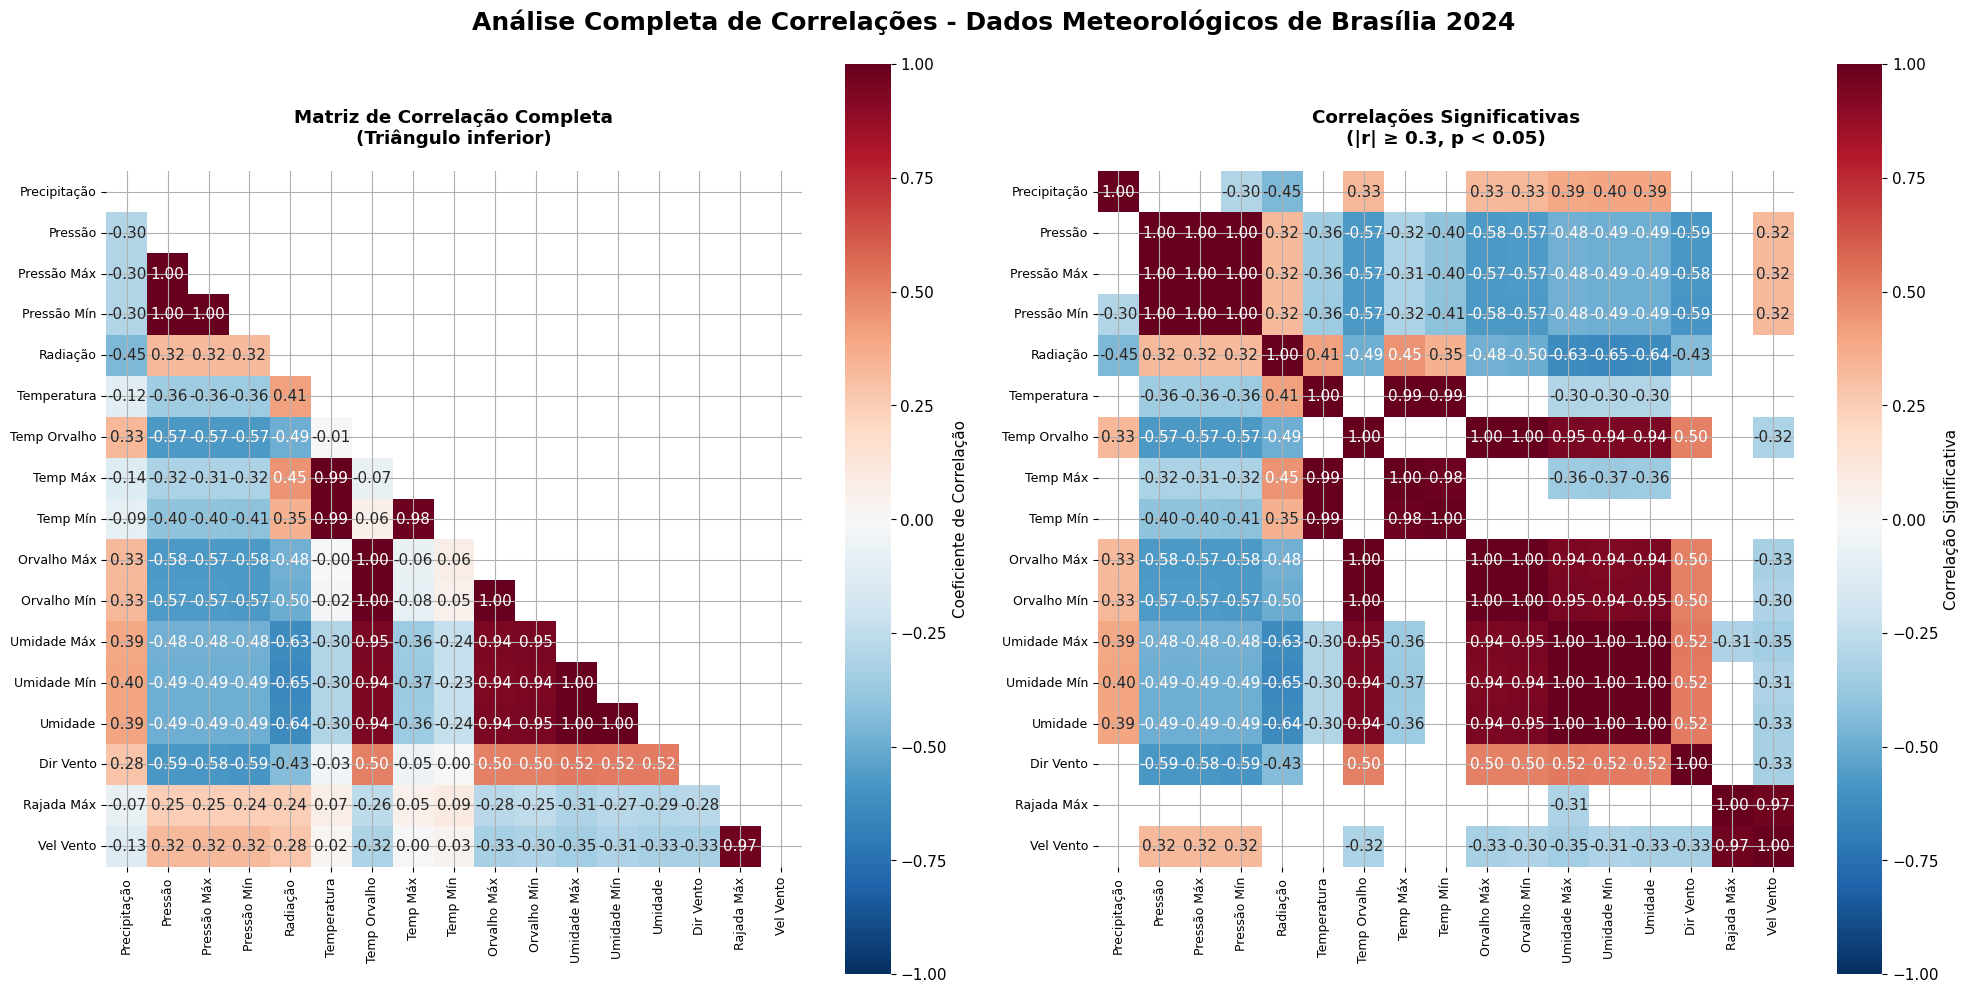


📋 RELATÓRIO DETALHADO DAS CORRELAÇÕES SIGNIFICATIVAS:
Rank Variáveis.........................................      r    p-val  Sig     Força
--------------------------------------------------------------------------------
   1 Pressão × Pressão Máx.............................  1.000 0.00e+00  ***     Forte
   2 Pressão × Pressão Mín.............................  1.000 0.00e+00  ***     Forte
   3 Pressão Máx × Pressão Mín.........................  1.000 0.00e+00  ***     Forte
   4 Temp Orvalho × Orvalho Mín........................  1.000 0.00e+00  ***     Forte
   5 Temp Orvalho × Orvalho Máx........................  1.000 0.00e+00  ***     Forte
   6 Umidade Máx × Umidade.............................  0.999 0.00e+00  ***     Forte
   7 Umidade Mín × Umidade.............................  0.999 0.00e+00  ***     Forte
   8 Orvalho Máx × Orvalho Mín.........................  0.999 0.00e+00  ***     Forte
   9 Umidade Máx × Umidade Mín.........................  0.996 0.00e+00  ***     

In [ ]:
# ===== ANÁLISE 6: CORRELAÇÕES MÚLTIPLAS E SIGNIFICATIVAS =====
print(f"\n📊 Análise 6: CORRELAÇÕES MÚLTIPLAS E SIGNIFICATIVAS")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pprint import pprint as pp

# ===== PREPARAR DADOS PARA ANÁLISE DE CORRELAÇÃO =====
print("\n🔧 Preparando dados para análise de correlação...")

# Obter lista de variáveis meteorológicas
variables_list = list(xarray_dataset.data_vars.keys())
print(f"📋 Total de variáveis disponíveis: {len(variables_list)}")

# Criar nomes simplificados para melhor visualização
nomes_simplificados = {
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Precipitação',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Pressão',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Pressão Máx',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Pressão Mín',
    'RADIACAO GLOBAL (Kj/m²)': 'Radiação',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Temperatura',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Temp Orvalho',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'Temp Máx',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'Temp Mín',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'Orvalho Máx',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'Orvalho Mín',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Umidade Máx',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Umidade Mín',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Umidade',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Dir Vento',
    'VENTO, RAJADA MAXIMA (m/s)': 'Rajada Máx',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Vel Vento'
}

print("\n📝 Nomes simplificados:")
for orig, simp in nomes_simplificados.items():
    print(f"  {simp:15s} <- {orig}")

# ===== CALCULAR DADOS DIÁRIOS PARA CADA VARIÁVEL =====
print("\n🧮 Calculando dados diários para cada variável...")
print("💡 Nota: Precipitação = ACUMULADA diária (soma), outras = MÉDIA diária")

dados_correlacao = {}
variaveis_validas = []

for var_original in variables_list:
    try:
        # Precipitação: somar (acumulado diário) | Outras: média diária
        if 'PRECIPITAÇÃO' in var_original:
            var_diaria = xarray_dataset[var_original].sum(dim='hour_utc').squeeze()
            calculo_usado = "acumulada"
        else:
            var_diaria = xarray_dataset[var_original].mean(dim='hour_utc').squeeze()
            calculo_usado = "média"

        # Extrair valores e remover NaN
        valores = var_diaria.values.flatten()
        valores_limpos = valores[~np.isnan(valores)]

        if len(valores_limpos) > 100:  # Mínimo de 100 observações válidas
            # Usar todos os valores (incluindo NaN para manter sincronismo)
            dados_correlacao[nomes_simplificados[var_original]] = valores
            variaveis_validas.append(var_original)
            print(f"  ✅ {nomes_simplificados[var_original]:15s}: {len(valores_limpos):3d} obs válidas de {len(valores):3d} total ({calculo_usado})")
        else:
            print(f"  ❌ {nomes_simplificados[var_original]:15s}: {len(valores_limpos):3d} obs (insuficiente)")

    except Exception as e:
        print(f"  ⚠️  {nomes_simplificados[var_original]:15s}: erro - {str(e)[:50]}")

print(f"\n📊 Variáveis válidas para correlação: {len(variaveis_validas)} de {len(variables_list)}")

# ===== CRIAR DATAFRAME PARA ANÁLISE =====
df_correlacao = pd.DataFrame(dados_correlacao)
print(f"\n📋 DataFrame criado: {df_correlacao.shape[0]} observações × {df_correlacao.shape[1]} variáveis")

# Verificar qualidade dos dados
print("\n🔍 QUALIDADE DOS DADOS:")
for col in df_correlacao.columns:
    total = len(df_correlacao[col])
    validos = df_correlacao[col].notna().sum()
    percentual = (validos/total)*100
    print(f"  {col:15s}: {validos:3d}/{total:3d} ({percentual:5.1f}% válidos)")

# ===== CALCULAR MATRIZ DE CORRELAÇÃO =====
print("\n🔢 Calculando matriz de correlação...")

# Calcular correlações com p-valores
correlacao_matrix = df_correlacao.corr()
n_vars = len(df_correlacao.columns)

# Calcular p-valores para significância estatística
p_values_matrix = np.full((n_vars, n_vars), np.nan)
for i, var1 in enumerate(df_correlacao.columns):
    for j, var2 in enumerate(df_correlacao.columns):
        if i != j:
            # Remover NaN para o cálculo
            mask = df_correlacao[var1].notna() & df_correlacao[var2].notna()
            if mask.sum() > 10:  # Mínimo 10 observações
                corr, p_val = pearsonr(df_correlacao[var1][mask], df_correlacao[var2][mask])
                p_values_matrix[i, j] = p_val
        else:
            p_values_matrix[i, j] = 0  # Diagonal principal

# Converter p-valores para DataFrame
p_values_df = pd.DataFrame(p_values_matrix,
                          index=df_correlacao.columns,
                          columns=df_correlacao.columns)

# ===== IDENTIFICAR CORRELAÇÕES SIGNIFICATIVAS =====
print("\n🎯 Identificando correlações significativas...")

# Critérios de significância
limiar_correlacao = 0.3  # |r| >= 0.3
limiar_p_valor = 0.05    # p < 0.05

correlacoes_significativas = []

for i, var1 in enumerate(correlacao_matrix.columns):
    for j, var2 in enumerate(correlacao_matrix.columns):
        if i < j:  # Evitar duplicatas (apenas triângulo superior)
            r = correlacao_matrix.iloc[i, j]
            p = p_values_matrix[i, j]

            if abs(r) >= limiar_correlacao and p < limiar_p_valor:
                correlacoes_significativas.append({
                    'Variável 1': var1,
                    'Variável 2': var2,
                    'Correlação': r,
                    'P-valor': p,
                    'Significância': '***' if p < 0.001 else '**' if p < 0.01 else '*',
                    'Força': 'Forte' if abs(r) >= 0.7 else 'Moderada' if abs(r) >= 0.5 else 'Fraca',
                    'Direção': 'Positiva' if r > 0 else 'Negativa'
                })

print(f"🔍 Correlações significativas encontradas: {len(correlacoes_significativas)}")

# ===== VISUALIZAR MATRIZ DE CORRELAÇÃO =====
print("\n🎨 Criando visualização da matriz de correlação...")

# Configurar figura - apenas 2 gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Análise Completa de Correlações - Dados Meteorológicos de Brasília 2024',
             fontsize=18, fontweight='bold', y=0.99)

# 1. HEATMAP COMPLETO DA MATRIZ DE CORRELAÇÃO
mask_triangular = np.triu(np.ones_like(correlacao_matrix, dtype=bool))
im1 = sns.heatmap(correlacao_matrix,
                  mask=mask_triangular,
                  annot=True,
                  fmt='.2f',
                  cmap='RdBu_r',
                  center=0,
                  square=True,
                  vmin=-1, vmax=1,
                  cbar_kws={'label': 'Coeficiente de Correlação'},
                  ax=ax1)
ax1.set_title('Matriz de Correlação Completa\n(Triângulo inferior)', fontweight='bold', pad=20)
ax1.tick_params(axis='both', labelsize=9)

# 2. HEATMAP APENAS CORRELAÇÕES SIGNIFICATIVAS
# Criar matriz mascarada apenas com correlações significativas
correlacao_significativa_matrix = correlacao_matrix.copy()
for i in range(len(correlacao_matrix)):
    for j in range(len(correlacao_matrix)):
        r = correlacao_matrix.iloc[i, j]
        p = p_values_matrix[i, j]
        if abs(r) < limiar_correlacao or p >= limiar_p_valor:
            if i != j:  # Manter diagonal
                correlacao_significativa_matrix.iloc[i, j] = np.nan

im2 = sns.heatmap(correlacao_significativa_matrix,
                  annot=True,
                  fmt='.2f',
                  cmap='RdBu_r',
                  center=0,
                  square=True,
                  vmin=-1, vmax=1,
                  cbar_kws={'label': 'Correlação Significativa'},
                  ax=ax2)
ax2.set_title(f'Correlações Significativas\n(|r| ≥ {limiar_correlacao}, p < {limiar_p_valor})',
              fontweight='bold', pad=20)
ax2.tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

# ===== RELATÓRIO DETALHADO DAS CORRELAÇÕES =====
print("\n📋 RELATÓRIO DETALHADO DAS CORRELAÇÕES SIGNIFICATIVAS:")
print("=" * 80)

if correlacoes_significativas:
    # Ordenar por força da correlação
    correlacoes_ordenadas = sorted(correlacoes_significativas,
                                 key=lambda x: abs(x['Correlação']),
                                 reverse=True)

    print(f"{'Rank':>4} {'Variáveis':.<50} {'r':>6} {'p-val':>8} {'Sig':>4} {'Força':>9}")
    print("-" * 80)

    for i, item in enumerate(correlacoes_ordenadas, 1):
        var_pair = f"{item['Variável 1']} × {item['Variável 2']}"
        print(f"{i:>4} {var_pair:.<50} {item['Correlação']:>6.3f} {item['P-valor']:>8.2e} "
              f"{item['Significância']:>4} {item['Força']:>9}")

    # ===== ANÁLISE POR CATEGORIAS =====
    print(f"\n🔍 ANÁLISE POR CATEGORIAS:")
    print("-" * 50)

    # Contar por força
    forte = sum(1 for item in correlacoes_significativas if item['Força'] == 'Forte')
    moderada = sum(1 for item in correlacoes_significativas if item['Força'] == 'Moderada')
    fraca = sum(1 for item in correlacoes_significativas if item['Força'] == 'Fraca')

    print(f"📊 Por Força da Correlação:")
    print(f"   Forte (|r| ≥ 0.7):     {forte:2d} correlações")
    print(f"   Moderada (0.5-0.7):    {moderada:2d} correlações")
    print(f"   Fraca (0.3-0.5):       {fraca:2d} correlações")

    # Contar por direção
    positiva = sum(1 for item in correlacoes_significativas if item['Direção'] == 'Positiva')
    negativa = sum(1 for item in correlacoes_significativas if item['Direção'] == 'Negativa')

    print(f"\n📈 Por Direção:")
    print(f"   Correlações Positivas: {positiva:2d}")
    print(f"   Correlações Negativas: {negativa:2d}")

    # Contar por significância
    muito_sig = sum(1 for item in correlacoes_significativas if item['Significância'] == '***')
    bem_sig = sum(1 for item in correlacoes_significativas if item['Significância'] == '**')
    sig = sum(1 for item in correlacoes_significativas if item['Significância'] == '*')

    print(f"\n⭐ Por Nível de Significância:")
    print(f"   Muito Significativa (p < 0.001): {muito_sig:2d}")
    print(f"   Bem Significativa (p < 0.01):    {bem_sig:2d}")
    print(f"   Significativa (p < 0.05):        {sig:2d}")

    # ===== TOP 10 CORRELAÇÕES MAIS FORTES =====
    print(f"\n🏆 TOP 10 CORRELAÇÕES MAIS FORTES:")
    print("-" * 60)

    for i, item in enumerate(correlacoes_ordenadas[:10], 1):
        seta = "↗️" if item['Direção'] == 'Positiva' else "↘️"
        print(f"{i:2d}. {seta} {item['Variável 1']} × {item['Variável 2']}")
        print(f"     r = {item['Correlação']:+.3f} ({item['Força']}, {item['Significância']})")

        # Interpretação meteorológica
        if item['Correlação'] > 0:
            print(f"     💡 Quando uma aumenta, a outra também tende a aumentar")
        else:
            print(f"     💡 Quando uma aumenta, a outra tende a diminuir")
        print()

else:
    print("❌ Nenhuma correlação significativa encontrada com os critérios estabelecidos.")
    print(f"   Critérios: |r| ≥ {limiar_correlacao} e p < {limiar_p_valor}")

# ===== RESUMO FINAL =====
print("\n🎯 RESUMO DA ANÁLISE:")
print("=" * 50)
print(f"📊 Total de variáveis analisadas: {len(df_correlacao.columns)}")
print(f"🔢 Total de correlações testadas: {len(df_correlacao.columns) * (len(df_correlacao.columns)-1) // 2}")
print(f"✅ Correlações significativas: {len(correlacoes_significativas)}")
print(f"📈 Taxa de significância: {len(correlacoes_significativas)/(len(df_correlacao.columns)*(len(df_correlacao.columns)-1)//2)*100:.1f}%")
print(f"🔍 Critérios utilizados:")
print(f"   • Força mínima: |r| ≥ {limiar_correlacao}")
print(f"   • Significância: p < {limiar_p_valor}")
print(f"   • Observações mínimas: 10 por par")

print("\n✅ Análise de correlações concluída com sucesso!")

### 6.7) ANÁLISE 7: DIAS CONSECUTIVOS SECOS E ÚMIDOS COM XCLIM


🌧️ Análise 7: MÁXIMO DE DIAS CONSECUTIVOS - VERSÃO XCLIM OTIMIZADA

🔧 Preparando dados otimizados para xclim...
💧 Calculando precipitação acumulada diária...
⚙️ Configurando metadados CF conventions...
✅ Dataset configurado:
   • Dimensões: ('time',)
   • Unidades: mm d-1
   • Standard name: precipitation_flux
   • Período: 2024-01-01T00:00:00.000000000 a 2024-12-31T00:00:00.000000000

📈 Estatísticas do Dataset:
   • Total de dias: 366
   • Precipitação total anual: 1398.6 mm
   • Precipitação média diária: 3.8 mm
   • Máximo diário: 70.2 mm
   • Dias com chuva (≥1mm): 108 dias
   • Dias secos (<1mm): 258 dias

🎯 Configurando análise multi-limiar:
   • Padrão Meteorológico (1.0mm): Separação básica seco/úmido
   • Chuva Significativa (5.0mm): Precipitação com impacto no solo
   • Chuva Moderada (10.0mm): Precipitação com recarga hídrica
   • Chuva Intensa (20.0mm): Precipitação de alto impacto

🧮 Calculando índices climatológicos com xclim...

📊 Processando: Padrão Meteorológico (Limi

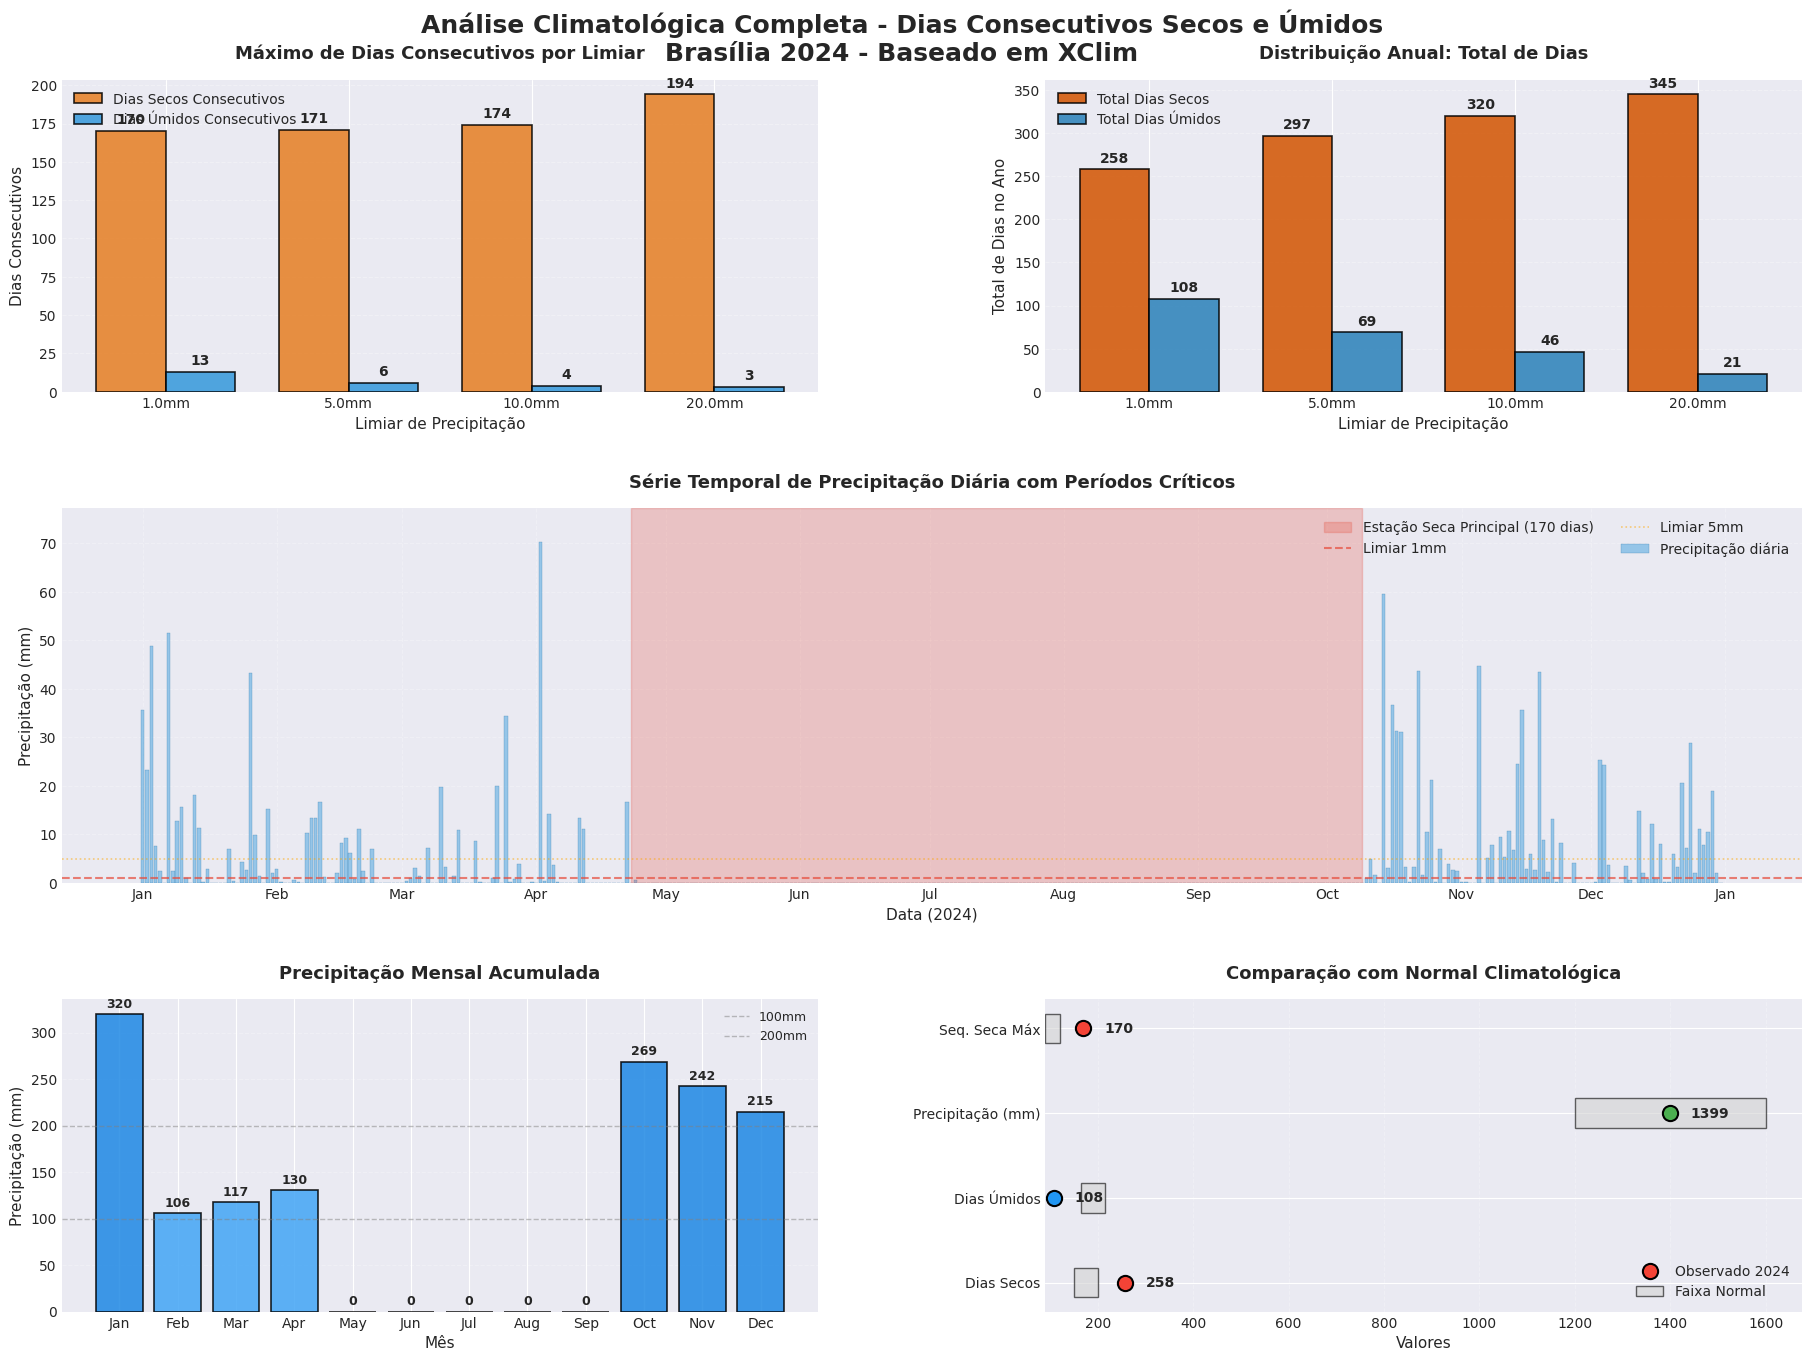


📋 RELATÓRIO TÉCNICO DETALHADO:

🔬 METODOLOGIA XCLIM:
✅ Biblioteca xclim v0.57.0 - Padrão internacional para índices climáticos
✅ Conformidade CF Conventions - Metadados padronizados
✅ Múltiplos limiares de análise - Visão abrangente do comportamento hídrico
✅ Índices validados pela comunidade científica internacional

📊 RESULTADOS DETALHADOS POR LIMIAR:

   🎯 Padrão Meteorológico (≥1.0mm):
      • Aplicação: Análise climatológica geral
      • Sequência seca máxima: 170 dias
      • Sequência úmida máxima: 13 dias
      • Total dias secos/ano: 258 dias
      • Total dias úmidos/ano: 108 dias
      • Porcentagem seca: 70.5%

   🎯 Chuva Significativa (≥5.0mm):
      • Aplicação: Agricultura e hidrologia
      • Sequência seca máxima: 171 dias
      • Sequência úmida máxima: 6 dias
      • Total dias secos/ano: 297 dias
      • Total dias úmidos/ano: 69 dias
      • Porcentagem seca: 81.1%

   🎯 Chuva Moderada (≥10.0mm):
      • Aplicação: Recursos hídricos
      • Sequência seca máxima:

In [ ]:
# ===== ANÁLISE 7: DIAS CONSECUTIVOS SECOS E ÚMIDOS COM XCLIM =====
print(f"\n🌧️ Análise 7: MÁXIMO DE DIAS CONSECUTIVOS - VERSÃO XCLIM OTIMIZADA")

import xclim as xc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualização
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# ===== PREPARAR DADOS COM METADADOS CORRETOS PARA XCLIM =====
print("\n🔧 Preparando dados otimizados para xclim...")

# Extrair precipitação acumulada diária
print("💧 Calculando precipitação acumulada diária...")
precip_diaria = xarray_dataset['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum(dim='hour_utc').squeeze()

# Remover dimensões extras se existirem
if len(precip_diaria.dims) > 1:
    for dim in precip_diaria.dims:
        if dim != 'date':
            precip_diaria = precip_diaria.isel({dim: 0})

# ===== CONFIGURAR METADADOS CF CONVENTIONS (ESSENCIAL!) =====
print("⚙️ Configurando metadados CF conventions...")

# Configurar unidades e metadados CF-compliant
precip_diaria.attrs.update({
    'units': 'mm d-1',
    'long_name': 'Daily precipitation',
    'standard_name': 'precipitation_flux',
    'cell_methods': 'time: sum'
})

# Renomear coordenada para 'time' (requerido pelo xclim)
precip_diaria = precip_diaria.rename({'date': 'time'})

# Configurar atributos da coordenada temporal
precip_diaria.time.attrs.update({
    'standard_name': 'time',
    'long_name': 'time',
    'axis': 'T'
})

print(f"✅ Dataset configurado:")
print(f"   • Dimensões: {precip_diaria.dims}")
print(f"   • Unidades: {precip_diaria.attrs['units']}")
print(f"   • Standard name: {precip_diaria.attrs['standard_name']}")
print(f"   • Período: {precip_diaria.time.values[0]} a {precip_diaria.time.values[-1]}")

# ===== ESTATÍSTICAS BÁSICAS =====
print(f"\n📈 Estatísticas do Dataset:")
print(f"   • Total de dias: {len(precip_diaria.time)}")
print(f"   • Precipitação total anual: {precip_diaria.sum().values:.1f} mm")
print(f"   • Precipitação média diária: {precip_diaria.mean().values:.1f} mm")
print(f"   • Máximo diário: {precip_diaria.max().values:.1f} mm")
print(f"   • Dias com chuva (≥1mm): {(precip_diaria >= 1).sum().values} dias")
print(f"   • Dias secos (<1mm): {(precip_diaria < 1).sum().values} dias")

# ===== DEFINIR MÚLTIPLOS LIMIARES PARA ANÁLISE COMPLETA =====
print(f"\n🎯 Configurando análise multi-limiar:")

limiares_analise = {
    'Padrão Meteorológico': {
        'valor': 1.0,
        'descricao': 'Separação básica seco/úmido',
        'aplicacao': 'Análise climatológica geral'
    },
    'Chuva Significativa': {
        'valor': 5.0,
        'descricao': 'Precipitação com impacto no solo',
        'aplicacao': 'Agricultura e hidrologia'
    },
    'Chuva Moderada': {
        'valor': 10.0,
        'descricao': 'Precipitação com recarga hídrica',
        'aplicacao': 'Recursos hídricos'
    },
    'Chuva Intensa': {
        'valor': 20.0,
        'descricao': 'Precipitação de alto impacto',
        'aplicacao': 'Gestão de riscos'
    }
}

for nome, config in limiares_analise.items():
    print(f"   • {nome} ({config['valor']}mm): {config['descricao']}")

# ===== CALCULAR ÍNDICES CLIMATOLÓGICOS COM XCLIM =====
print(f"\n🧮 Calculando índices climatológicos com xclim...")

# Dicionário para armazenar todos os resultados
resultados_completos = {}

for nome_limiar, config in limiares_analise.items():
    print(f"\n📊 Processando: {nome_limiar} (Limiar: {config['valor']}mm)")

    # Criar threshold no formato correto
    thresh_str = f"{config['valor']} mm d-1"

    try:
        # ===== ÍNDICES DE DIAS CONSECUTIVOS =====
        print(f"   🏜️ Calculando dias secos consecutivos...")
        max_dry_days = xc.indices.maximum_consecutive_dry_days(
            pr=precip_diaria,
            thresh=thresh_str,
            freq='YS'
        )

        print(f"   🌧️ Calculando dias úmidos consecutivos...")
        max_wet_days = xc.indices.maximum_consecutive_wet_days(
            pr=precip_diaria,
            thresh=thresh_str,
            freq='YS'
        )

        # ===== ÍNDICES ADICIONAIS DE PRECIPITAÇÃO =====
        print(f"   📊 Calculando índices complementares...")

        # Calcular totais manualmente
        limiar_valor = config['valor']
        total_dias_secos = int((precip_diaria < limiar_valor).sum().values)
        total_dias_umidos = int((precip_diaria >= limiar_valor).sum().values)

        # Precipitação total anual usando xclim
        precip_total = precip_diaria.sum()

        # ===== EXTRAIR E ARMAZENAR RESULTADOS =====
        resultados_completos[nome_limiar] = {
            'limiar_mm': config['valor'],
            'max_dias_secos': int(max_dry_days.values[0]),
            'max_dias_umidos': int(max_wet_days.values[0]),
            'total_dias_secos': total_dias_secos,
            'total_dias_umidos': total_dias_umidos,
            'precipitacao_total': float(precip_total.values),
            'descricao': config['descricao'],
            'aplicacao': config['aplicacao']
        }

        print(f"   ✅ Sequência seca máxima: {resultados_completos[nome_limiar]['max_dias_secos']} dias")
        print(f"   ✅ Sequência úmida máxima: {resultados_completos[nome_limiar]['max_dias_umidos']} dias")
        print(f"   ✅ Total dias secos no ano: {resultados_completos[nome_limiar]['total_dias_secos']} dias")
        print(f"   ✅ Total dias úmidos no ano: {resultados_completos[nome_limiar]['total_dias_umidos']} dias")

    except Exception as e:
        print(f"   ❌ Erro no processamento: {str(e)}")
        resultados_completos[nome_limiar] = {
            'limiar_mm': config['valor'],
            'erro': str(e)
        }

# ===== ANÁLISE DE PERÍODOS ESPECÍFICOS =====
print(f"\n🔍 Análise de períodos específicos...")

# Identificar início e fim da estação seca principal
limiar_principal = 1.0  # mm
precip_values = precip_diaria.values
dates_array = precip_diaria.time.values

# Encontrar a sequência seca mais longa
dias_secos_mask = precip_values < limiar_principal
mudancas = np.diff(np.concatenate(([False], dias_secos_mask, [False])).astype(int))
inicios = np.where(mudancas == 1)[0]
fins = np.where(mudancas == -1)[0]

if len(inicios) > 0 and len(fins) > 0:
    duracoes = fins - inicios
    idx_max = np.argmax(duracoes)

    inicio_seca_principal = inicios[idx_max]
    fim_seca_principal = fins[idx_max] - 1
    duracao_seca_principal = duracoes[idx_max]

    data_inicio = pd.to_datetime(dates_array[inicio_seca_principal])
    data_fim = pd.to_datetime(dates_array[fim_seca_principal])

    print(f"🏜️ ESTAÇÃO SECA PRINCIPAL 2024:")
    print(f"   • Duração: {duracao_seca_principal} dias")
    print(f"   • Início: {data_inicio.strftime('%d/%m/%Y')} (dia {data_inicio.timetuple().tm_yday} do ano)")
    print(f"   • Fim: {data_fim.strftime('%d/%m/%Y')} (dia {data_fim.timetuple().tm_yday} do ano)")
    print(f"   • Meses abrangidos: {data_inicio.strftime('%B')} a {data_fim.strftime('%B')}")

# ===== CRIAR VISUALIZAÇÕES PROFISSIONAIS =====
print(f"\n🎨 Criando visualizações profissionais...")

# Configurar figura principal com layout otimizado
fig = plt.figure(figsize=(20, 14))

# Criar grid com espaçamentos otimizados
gs = fig.add_gridspec(3, 2,
                      height_ratios=[1, 1.2, 1],
                      hspace=0.35,  # Espaçamento vertical entre subplots
                      wspace=0.3,   # Espaçamento horizontal entre subplots
                      top=0.93,     # Margem superior
                      bottom=0.05,  # Margem inferior
                      left=0.08,    # Margem esquerda
                      right=0.95)   # Margem direita

# Título principal
fig.suptitle('Análise Climatológica Completa - Dias Consecutivos Secos e Úmidos\nBrasília 2024 - Baseado em XClim',
             fontsize=18, fontweight='bold', y=0.98)

# Definir cores consistentes
cor_seco = '#E67E22'
cor_seco_escuro = '#D35400'
cor_umido = '#3498DB'
cor_umido_escuro = '#2980B9'
cor_destaque = '#E74C3C'

# ===== 1. COMPARAÇÃO DE LIMIARES - DIAS CONSECUTIVOS =====
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Máximo de Dias Consecutivos por Limiar', fontweight='bold', fontsize=13, pad=15)

limiares_nomes = list(resultados_completos.keys())
valores_secos = [resultados_completos[nome].get('max_dias_secos', 0) for nome in limiares_nomes]
valores_umidos = [resultados_completos[nome].get('max_dias_umidos', 0) for nome in limiares_nomes]
limiares_mm = [resultados_completos[nome].get('limiar_mm', 0) for nome in limiares_nomes]

x = np.arange(len(limiares_nomes))
width = 0.38

bars1 = ax1.bar(x - width/2, valores_secos, width,
                label='Dias Secos Consecutivos',
                color=cor_seco, alpha=0.85, edgecolor='black', linewidth=1.2)
bars2 = ax1.bar(x + width/2, valores_umidos, width,
                label='Dias Úmidos Consecutivos',
                color=cor_umido, alpha=0.85, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_xlabel('Limiar de Precipitação', fontsize=11)
ax1.set_ylabel('Dias Consecutivos', fontsize=11)
ax1.set_xticks(x)
ax1.set_xticklabels([f'{lim}mm' for lim in limiares_mm], fontsize=10)
ax1.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
ax1.set_axisbelow(True)

# ===== 2. DISTRIBUIÇÃO ANUAL - TOTAL DE DIAS =====
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Distribuição Anual: Total de Dias', fontweight='bold', fontsize=13, pad=15)

total_secos = [resultados_completos[nome].get('total_dias_secos', 0) for nome in limiares_nomes]
total_umidos = [resultados_completos[nome].get('total_dias_umidos', 0) for nome in limiares_nomes]

bars3 = ax2.bar(x - width/2, total_secos, width,
                label='Total Dias Secos',
                color=cor_seco_escuro, alpha=0.85, edgecolor='black', linewidth=1.2)
bars4 = ax2.bar(x + width/2, total_umidos, width,
                label='Total Dias Úmidos',
                color=cor_umido_escuro, alpha=0.85, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.set_xlabel('Limiar de Precipitação', fontsize=11)
ax2.set_ylabel('Total de Dias no Ano', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels([f'{lim}mm' for lim in limiares_mm], fontsize=10)
ax2.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_axisbelow(True)

# ===== 3. SÉRIE TEMPORAL COM DESTAQUE PARA PERÍODOS CRÍTICOS =====
ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('Série Temporal de Precipitação Diária com Períodos Críticos',
              fontweight='bold', fontsize=13, pad=15)

dates_plot = pd.to_datetime(dates_array)
precipitacao_mm = precip_values

# Plotar precipitação diária
bars = ax3.bar(dates_plot, precipitacao_mm, width=0.8, alpha=0.6,
               color='#5DADE2', edgecolor='#2874A6', linewidth=0.3,
               label='Precipitação diária')

# Destacar estação seca principal
if 'inicio_seca_principal' in locals():
    ax3.axvspan(dates_plot[inicio_seca_principal], dates_plot[fim_seca_principal],
                alpha=0.25, color=cor_destaque,
                label=f'Estação Seca Principal ({duracao_seca_principal} dias)')

# Adicionar linha de limiar
ax3.axhline(y=1, color=cor_destaque, linestyle='--', alpha=0.7, linewidth=1.5,
            label='Limiar 1mm')
ax3.axhline(y=5, color='orange', linestyle=':', alpha=0.5, linewidth=1.2,
            label='Limiar 5mm')

ax3.set_xlabel('Data (2024)', fontsize=11)
ax3.set_ylabel('Precipitação (mm)', fontsize=11)
ax3.legend(loc='upper right', fontsize=10, framealpha=0.95, ncol=2)
ax3.grid(True, alpha=0.25, linestyle='--')
ax3.set_axisbelow(True)

# Formatar eixo x
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))

# Adicionar limites do eixo y
ax3.set_ylim(0, max(precipitacao_mm) * 1.1)

# ===== 4. ANÁLISE SAZONAL DETALHADA =====
ax4 = fig.add_subplot(gs[2, 0])
ax4.set_title('Precipitação Mensal Acumulada', fontweight='bold', fontsize=13, pad=15)

# Calcular precipitação mensal
precip_mensal = precip_diaria.resample(time='M').sum()
meses = pd.to_datetime(precip_mensal.time.values)
meses_nomes = [mes.strftime('%b') for mes in meses]

# Definir cores baseadas nos valores
cores_mensais = []
for valor in precip_mensal.values:
    if valor > 200:
        cores_mensais.append('#1E88E5')  # Azul forte - muito úmido
    elif valor > 100:
        cores_mensais.append('#42A5F5')  # Azul médio - úmido
    elif valor > 50:
        cores_mensais.append('#FFA726')  # Laranja - transição
    else:
        cores_mensais.append('#EF5350')  # Vermelho - seco

bars_mensal = ax4.bar(meses_nomes, precip_mensal.values,
                      color=cores_mensais,
                      alpha=0.85, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bar, valor in zip(bars_mensal, precip_mensal.values):
    ax4.annotate(f'{valor:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, valor),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Adicionar linhas de referência
ax4.axhline(y=100, color='gray', linestyle='--', alpha=0.5, linewidth=1, label='100mm')
ax4.axhline(y=200, color='gray', linestyle='--', alpha=0.5, linewidth=1, label='200mm')

ax4.set_xlabel('Mês', fontsize=11)
ax4.set_ylabel('Precipitação (mm)', fontsize=11)
ax4.legend(loc='upper right', fontsize=9, framealpha=0.95)
ax4.grid(True, alpha=0.25, axis='y', linestyle='--')
ax4.set_axisbelow(True)

# ===== 5. COMPARAÇÃO COM CLIMATOLOGIA NORMAL =====
ax5 = fig.add_subplot(gs[2, 1])
ax5.set_title('Comparação com Normal Climatológica', fontweight='bold', fontsize=13, pad=15)

# Dados climatológicos médios para Brasília
climatologia_normal = {
    'Dias Secos': [150, 200],  # Faixa normal
    'Dias Úmidos': [165, 215],
    'Precipitação (mm)': [1200, 1600],
    'Seq. Seca Máx': [90, 120]
}

# Dados observados em 2024
if 'Padrão Meteorológico' in resultados_completos and 'erro' not in resultados_completos['Padrão Meteorológico']:
    dados_padrao = resultados_completos['Padrão Meteorológico']
    observado_2024 = {
        'Dias Secos': dados_padrao['total_dias_secos'],
        'Dias Úmidos': dados_padrao['total_dias_umidos'],
        'Precipitação (mm)': dados_padrao['precipitacao_total'],
        'Seq. Seca Máx': dados_padrao['max_dias_secos']
    }
else:
    observado_2024 = {
        'Dias Secos': int((precip_diaria < 1.0).sum().values),
        'Dias Úmidos': int((precip_diaria >= 1.0).sum().values),
        'Precipitação (mm)': float(precip_diaria.sum().values),
        'Seq. Seca Máx': duracao_seca_principal
    }

categorias = list(climatologia_normal.keys())
y_pos = np.arange(len(categorias))

# Plotar faixas normais
for i, cat in enumerate(categorias):
    min_val, max_val = climatologia_normal[cat]
    ax5.barh(i, max_val - min_val, left=min_val, height=0.35,
             color='lightgray', alpha=0.6, edgecolor='black', linewidth=1,
             label='Faixa Normal' if i == 0 else "")

# Plotar valores observados
for i, cat in enumerate(categorias):
    valor_obs = observado_2024[cat]

    # Definir cor baseada na posição relativa à faixa normal
    min_val, max_val = climatologia_normal[cat]
    if valor_obs < min_val:
        cor_ponto = '#2196F3'  # Azul - abaixo do normal
    elif valor_obs > max_val:
        cor_ponto = '#F44336'  # Vermelho - acima do normal
    else:
        cor_ponto = '#4CAF50'  # Verde - normal

    ax5.scatter(valor_obs, i, color=cor_ponto, s=120, zorder=5,
                edgecolors='black', linewidth=1.5,
                label='Observado 2024' if i == 0 else "")

    # Adicionar valor
    ax5.annotate(f'{valor_obs:.0f}',
                xy=(valor_obs, i),
                xytext=(15, 0),
                textcoords="offset points",
                ha='left', va='center', fontweight='bold', fontsize=10)

ax5.set_yticks(y_pos)
ax5.set_yticklabels(categorias, fontsize=10)
ax5.set_xlabel('Valores', fontsize=11)
ax5.legend(loc='lower right', fontsize=10, framealpha=0.95)
ax5.grid(True, alpha=0.25, axis='x', linestyle='--')
ax5.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()
plt.show()

# ===== RELATÓRIO TÉCNICO DETALHADO =====
print(f"\n📋 RELATÓRIO TÉCNICO DETALHADO:")
print("=" * 80)

print(f"\n🔬 METODOLOGIA XCLIM:")
print(f"✅ Biblioteca xclim v{xc.__version__} - Padrão internacional para índices climáticos")
print("✅ Conformidade CF Conventions - Metadados padronizados")
print("✅ Múltiplos limiares de análise - Visão abrangente do comportamento hídrico")
print("✅ Índices validados pela comunidade científica internacional")

print(f"\n📊 RESULTADOS DETALHADOS POR LIMIAR:")
for nome, dados in resultados_completos.items():
    if 'erro' not in dados:
        print(f"\n   🎯 {nome} (≥{dados['limiar_mm']}mm):")
        print(f"      • Aplicação: {dados['aplicacao']}")
        print(f"      • Sequência seca máxima: {dados['max_dias_secos']} dias")
        print(f"      • Sequência úmida máxima: {dados['max_dias_umidos']} dias")
        print(f"      • Total dias secos/ano: {dados['total_dias_secos']} dias")
        print(f"      • Total dias úmidos/ano: {dados['total_dias_umidos']} dias")
        print(f"      • Porcentagem seca: {(dados['total_dias_secos']/366)*100:.1f}%")

print(f"\n🌍 CONTEXTO BIOMA CERRADO:")
print("🌿 O Cerrado é caracterizado por:")
print("   • Estação seca bem definida (maio-setembro): 120-150 dias")
print("   • Estação chuvosa concentrada (outubro-abril): 210-240 dias")
print("   • Precipitação anual típica: 1200-1600 mm")
print("   • Transições rápidas entre estações")

if 'inicio_seca_principal' in locals():
    print(f"\n📈 AVALIAÇÃO DO ANO 2024:")

    # Classificação da severidade da seca
    if duracao_seca_principal > 160:
        severidade = "EXTREMA"
        cor_status = "🔥"
    elif duracao_seca_principal > 140:
        severidade = "SEVERA"
        cor_status = "⚠️ "
    elif duracao_seca_principal > 120:
        severidade = "MODERADA"
        cor_status = "☀️ "
    else:
        severidade = "LEVE"
        cor_status = "🌤️ "

    print(f"   {cor_status} Seca {severidade}: {duracao_seca_principal} dias")
    print(f"   📅 Período: {data_inicio.strftime('%d/%m')} a {data_fim.strftime('%d/%m')} (dia {data_inicio.timetuple().tm_yday}-{data_fim.timetuple().tm_yday})")

    # Classificação da precipitação
    if 'Padrão Meteorológico' in resultados_completos and 'erro' not in resultados_completos['Padrão Meteorológico']:
        precip_total = resultados_completos['Padrão Meteorológico']['precipitacao_total']
    else:
        precip_total = float(precip_diaria.sum().values)

    if precip_total > 1600:
        status_precip = "ACIMA DA MÉDIA"
        cor_precip = "💧"
    elif precip_total > 1200:
        status_precip = "NORMAL"
        cor_precip = "✅"
    elif precip_total > 800:
        status_precip = "ABAIXO DA MÉDIA"
        cor_precip = "⚠️ "
    else:
        status_precip = "MUITO BAIXA"
        cor_precip = "🏜️ "

    print(f"   {cor_precip} Precipitação {status_precip}: {precip_total:.0f}mm")

print("\n✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
print("=" * 80)

## 7) Processamento e Conversão de Múltoplos Arquivo CSV

Enquanto a função parse_inmet_csv_to_netcdf_robust() lida com a complexidade da conversão de um único arquivo, a função convert_csvs_to_netcdf() eleva o processo para um nível de automação, permitindo a conversão em lote de maneira eficiente e flexível.

Esta função é a ferramenta ideal para processar grandes volumes de dados.

Ela percorre uma pasta de arquivos CSV do INMET e converte cada um para o formato NetCDF, mas com a grande vantagem de permitir o uso de filtros. Você pode escolher quais arquivos processar com base em:

1. uf: Filtra por uma ou mais Unidades Federativas (e.g., "DF", ["DF", "GO"]).

2. region: Filtra por uma ou mais Regiões Geográficas (e.g., "CO", ["CO", "SE"]).

3. wmo_code: Filtra por um ou mais códigos de estação da WMO (e.g., "A001").

O código a seguir demonstra diferentes exemplos de como utilizar esses filtros. Para testá-los, basta descomentar a linha de código desejada e executá-la. A função retornará um resumo detalhado do processo, informando quantos arquivos foram encontrados, convertidos ou ignorados.

In [ ]:
# Alguns exemplos de uso:

# 1. Converter TODOS os arquivos (566 arquivos) -> demora muito tempo para processar
# result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", all_files=True)

# 2. Converter apenas Brasília
# Tempo de Execução: 15 minutos
result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", uf="DF")

# 3. Converter região Centro-Oeste
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", region="CO")

# 4. Múltiplas UFs
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", uf=["DF", "SP", "RJ"])

# 5. Múltiplas regiões
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", region=["CO", "SE"])

# 6. Código WMO específico
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", wmo_code="A001")

# 8. Múltiplas códigos WMO específicos
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", wmo_code=["A001","A042"])

# 9. Combinação de filtros
# result = convert_csvs_to_netcdf("/content/INMET_2024/CSV",
#                                region="CO", uf=["DF", "GO"])

🔍 Procurando arquivos CSV em: /content/INMET_2024/CSV
💾 Salvando NetCDF em: /content/INMET_2024/NETCDF
📁 Encontrados 565 arquivos CSV do INMET
🎯 Arquivos selecionados para conversão: 5

📊 [1/5] Processando: INMET_CO_DF_A047_PARANOA (COOPA-DF)_01-01-2024_A_31-12-2024.CSV
⏭️ Pulando arquivo existente: INMET_CO_DF_A047_PARANOA (COOPA-DF)_01-01-2024_A_31-12-2024.nc
   💾 Tamanho existente: 1.1 MB

📊 [2/5] Processando: INMET_CO_DF_A001_BRASILIA_01-01-2024_A_31-12-2024.CSV
⏭️ Pulando arquivo existente: INMET_CO_DF_A001_BRASILIA_01-01-2024_A_31-12-2024.nc
   💾 Tamanho existente: 1.1 MB

📊 [3/5] Processando: INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2024_A_31-12-2024.CSV
⏭️ Pulando arquivo existente: INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2024_A_31-12-2024.nc
   💾 Tamanho existente: 1.1 MB

📊 [4/5] Processando: INMET_CO_DF_A042_BRAZLANDIA_01-01-2024_A_31-12-2024.CSV
⏭️ Pulando arquivo existente: INMET_CO_DF_A042_BRAZLANDIA_01-01-2024_A_31-12-2024.nc
   💾 Tamanho existente: 1.1 MB

📊 [5/5] Proc

In [ ]:
result.saved_paths

['/content/INMET_2024/NETCDF/INMET_CO_DF_A047_PARANOA (COOPA-DF)_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_CO_DF_A001_BRASILIA_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_CO_DF_A042_BRAZLANDIA_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_CO_DF_A045_AGUAS EMENDADAS_01-01-2024_A_31-12-2024.nc']

In [ ]:
# Tempode de ExecuçãoÇ 9 segundos
# remover warnings
import warnings
warnings.filterwarnings("ignore")

combined_ds = xr.open_mfdataset(result.saved_paths, concat_dim='wmo_code', combine='nested')
combined_ds

<xarray.Dataset> Size: 747MB
Dimensions:                                                (region: 1, uf: 1,
                                                            wmo_code: 5,
                                                            date: 366,
                                                            hour_utc: 24,
                                                            lat: 5, lon: 5,
                                                            alt: 5)
Coordinates:
  * date                                                   (date) datetime64[ns] 3kB ...
  * hour_utc                                               (hour_utc) timedelta64[ns] 192B ...
  * region                                                 (region) object 8B ...
  * uf                                                     (uf) object 8B 'DF'
  * lat                                                    (lat) float64 40B ...
  * lon                                                    (lon) float64 40B ...
  * alt                                                    (alt) float64 40B ...
  * wmo_code                                               (wmo_code) object 40B ...
Data variables: (12/17)
    PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    RADIACAO GLOBAL (Kj/m²)                                (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    ...                                                     ...
    UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    UMIDADE RELATIVA DO AR, HORARIA (%)                    (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    VENTO, DIREÇÃO HORARIA (gr) (° (gr))                   (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    VENTO, RAJADA MAXIMA (m/s)                             (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
    VENTO, VELOCIDADE HORARIA (m/s)                        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 44MB dask.array<chunksize=(1, 1, 1, 366, 24, 1, 1, 1), meta=np.ndarray>
Attributes: (12/13)
    source:              INMET
    station:             PARANOA (COOPA-DF)
    date_of_foundation:  07/02/17
    title:               Dados meteorológicos horários - PARANOA (COOPA-DF)
    institution:         Instituto Nacional de Meteorologia (INMET)
    region:              CO
    ...                  ...
    wmo_code:            A047
    latitude:            -16.012222
    longitude:           -47.557417
    altit

### 7.1) Exemplo de análise espacial de múltiplos processamentos

🗺️ Preparando dados das estações do DF...
📊 Dataset combinado carregado: {'region': 1, 'uf': 1, 'wmo_code': 5, 'date': 366, 'hour_utc': 24, 'lat': 5, 'lon': 5, 'alt': 5}
📍 Encontradas 5 estações:
   1. Estação A047 (A047): -16.012°S, 48.137°W
   2. Estação A001 (A001): -15.935°S, 48.131°W
   3. Estação A046 (A046): -15.789°S, 47.926°W
   4. Estação A042 (A042): -15.600°S, 47.626°W
   5. Estação A045 (A045): -15.596°S, 47.557°W

🌍 VERIFICAÇÃO DE COORDENADAS:
   Latitudes: -16.012 a -15.596
   Longitudes: -48.137 a -47.557
   ✅ Todas as estações estão dentro dos limites esperados do DF

💧 Calculando precipitação mensal...
   🔍 Dimensões do dataset: {'region': 1, 'uf': 1, 'wmo_code': 5, 'date': 366, 'hour_utc': 24, 'lat': 5, 'lon': 5, 'alt': 5}
   📅 Período: 2024-01-01T00:00:00.000000000 a 2024-12-31T00:00:00.000000000
   🏢 Estações: 5
   📊 Dimensões precip_diaria: ('region', 'uf', 'wmo_code', 'date', 'lat', 'lon', 'alt')
   📊 Shape precip_diaria: (1, 1, 5, 366, 5, 5, 5)
   📊 Dimensões ap

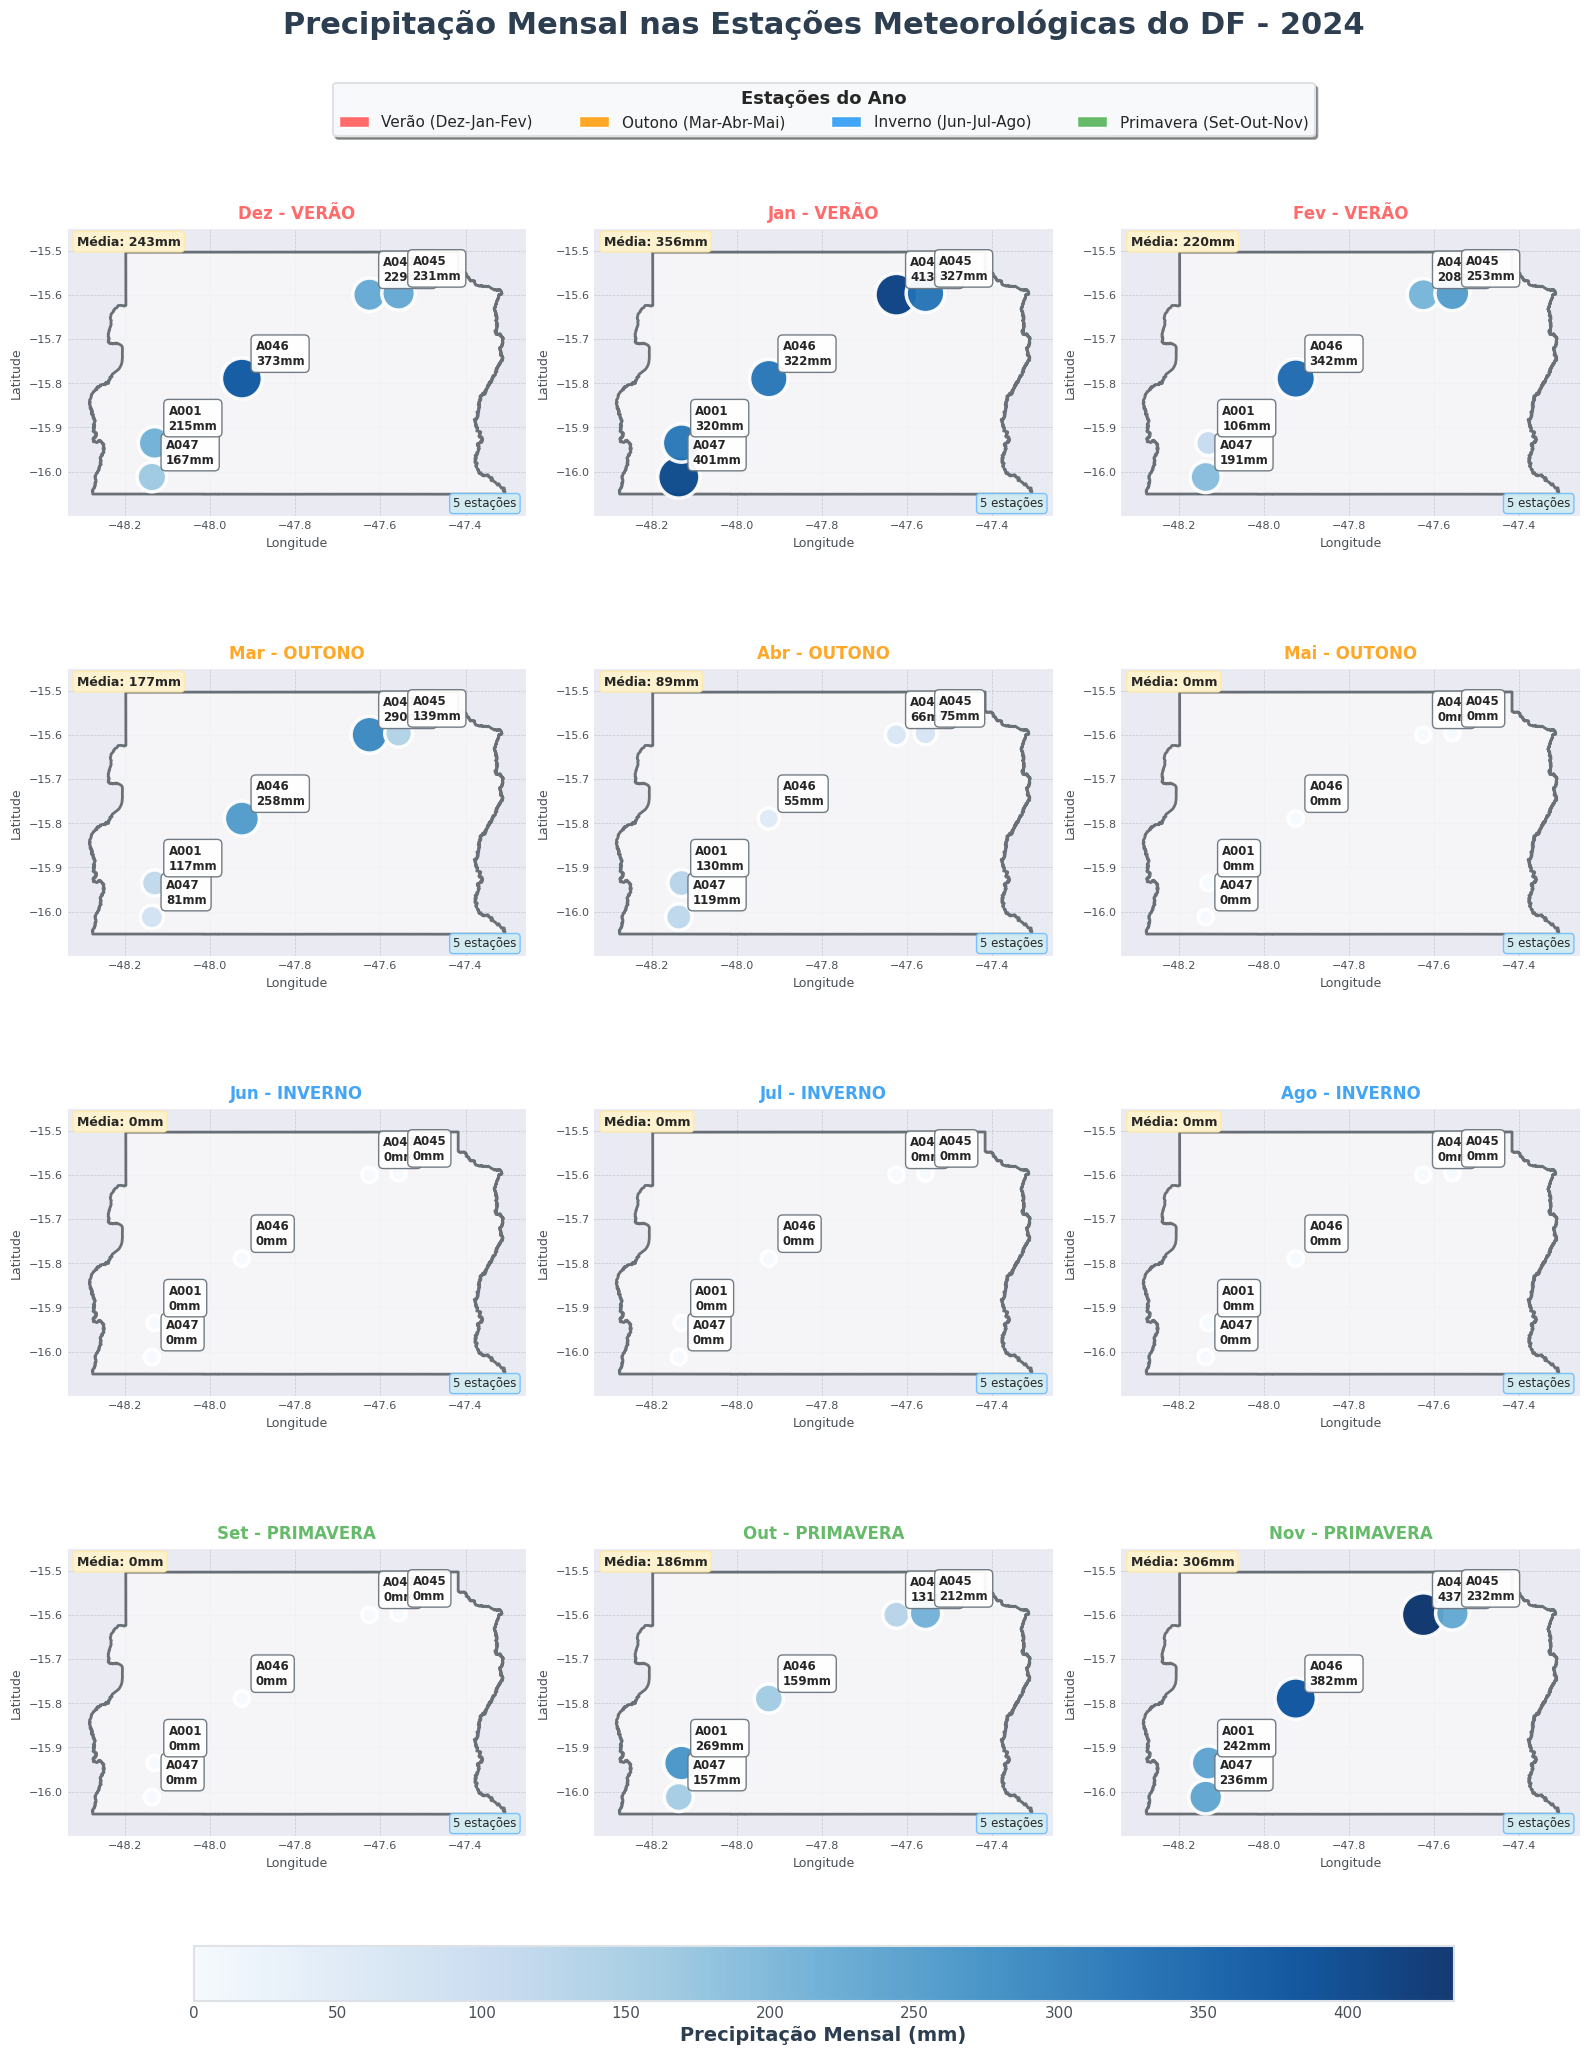


📊 ESTATÍSTICAS RESUMIDAS:
   Estação A047 (A047): 1351mm/ano
   Estação A001 (A001): 1399mm/ano
   Estação A046 (A046): 1891mm/ano
   Estação A042 (A042): 1774mm/ano
   Estação A045 (A045): 1469mm/ano

📅 MÉDIAS MENSAIS DO DF:
   Dez: 243mm
   Jan: 356mm
   Fev: 220mm
   Mar: 177mm
   Abr: 89mm
   Mai: 0mm
   Jun: 0mm
   Jul: 0mm
   Ago: 0mm
   Set: 0mm
   Out: 186mm
   Nov: 306mm

🌡️ MÉDIAS POR ESTAÇÃO DO ANO:
   Verão: 273mm
   Outono: 89mm
   Inverno: 0mm
   Primavera: 164mm

✅ Mapa de precipitação mensal criado com sucesso!
📍 5 estações plotadas
🗓️ 12 meses organizados por estações do ano
💧 Escala: 0 - 437mm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import geobr

# Assumindo que você já tem o dataset carregado como 'combined_ds' ou similar
# combined_ds = seu dataset com múltiplas estações

# ===== PREPARAR DADOS DAS ESTAÇÕES =====
print("🗺️ Preparando dados das estações do DF...")

# Verificar se o dataset foi carregado corretamente
if 'combined_ds' not in locals():
    print("❌ Dataset 'combined_ds' não encontrado!")
    print("💡 Carregando dataset automaticamente...")

    # Tentar carregar automaticamente
    pattern = "/content/INMET_2024/NETCDF/INMET_CO_DF_*.nc"
    try:
        combined_ds = xr.open_mfdataset(pattern, concat_dim='wmo_code', combine='nested')
        print("✅ Dataset carregado automaticamente")
    except Exception as e:
        print(f"❌ Erro ao carregar dataset: {e}")
        print("🔧 Por favor, carregue o dataset manualmente:")
        print("combined_ds = xr.open_mfdataset('/content/INMET_2024/NETCDF/INMET_CO_DF_*.nc', concat_dim='wmo_code', combine='nested')")
        raise

print(f"📊 Dataset combinado carregado: {dict(combined_ds.dims)}")

# Extrair coordenadas das estações
latitudes = combined_ds.lat.values
longitudes = combined_ds.lon.values
wmo_codes = combined_ds.wmo_code.values

# Extrair nomes das estações dos atributos
station_names = []
for i in range(len(combined_ds.wmo_code)):
    # Tentar extrair informações reais se possível
    try:
        # Se o dataset tem informações das estações
        if hasattr(combined_ds, 'attrs') and 'station' in combined_ds.attrs:
            station_name = f"Estação {wmo_codes[i]}"
        else:
            station_name = f"Estação {wmo_codes[i]}"
    except:
        station_name = f"Estação {wmo_codes[i]}"
    station_names.append(station_name)

print(f"📍 Encontradas {len(latitudes)} estações:")
for i, (lat, lon, wmo, name) in enumerate(zip(latitudes, longitudes, wmo_codes, station_names)):
    print(f"   {i+1}. {name} ({wmo}): {lat:.3f}°S, {abs(lon):.3f}°W")

# Verificar coordenadas das estações
print(f"\n🌍 VERIFICAÇÃO DE COORDENADAS:")
print(f"   Latitudes: {latitudes.min():.3f} a {latitudes.max():.3f}")
print(f"   Longitudes: {longitudes.min():.3f} a {longitudes.max():.3f}")

# Verificar se as coordenadas estão dentro do DF
df_lat_range = (-16.1, -15.5)  # Aproximado para o DF
df_lon_range = (-48.3, -47.3)  # Aproximado para o DF

coordenadas_ok = True
for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
    if not (df_lat_range[0] <= lat <= df_lat_range[1]) or not (df_lon_range[0] <= lon <= df_lon_range[1]):
        print(f"   ⚠️ Estação {wmo_codes[i]} pode estar fora do DF: {lat:.3f}, {lon:.3f}")
        coordenadas_ok = False

if coordenadas_ok:
    print(f"   ✅ Todas as estações estão dentro dos limites esperados do DF")

# ===== CALCULAR PRECIPITAÇÃO MENSAL POR ESTAÇÃO =====
print("\n💧 Calculando precipitação mensal...")

# Primeiro, vamos verificar a estrutura dos dados
print(f"   🔍 Dimensões do dataset: {dict(combined_ds.dims)}")
print(f"   📅 Período: {combined_ds.date.values[0]} a {combined_ds.date.values[-1]}")
print(f"   🏢 Estações: {len(combined_ds.wmo_code)}")

# Calcular precipitação diária para cada estação
# Somar apenas a dimensão hour_utc, mantendo as outras dimensões
precip_diaria = combined_ds['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum(dim='hour_utc')

print(f"   📊 Dimensões precip_diaria: {precip_diaria.dims}")
print(f"   📊 Shape precip_diaria: {precip_diaria.shape}")

# Simplificar: somar todas as dimensões espaciais extras (lat, lon, alt)
# já que cada estação tem coordenadas únicas
precip_diaria = precip_diaria.sum(dim=['region', 'uf', 'lat', 'lon', 'alt'])

print(f"   📊 Dimensões após simplificação: {precip_diaria.dims}")
print(f"   📊 Shape após simplificação: {precip_diaria.shape}")

# Agora devemos ter dimensões (wmo_code, date)
# Adicionar coordenada de mês
month_values = precip_diaria.date.dt.month.values
precip_diaria = precip_diaria.assign_coords(month=('date', month_values))

# Agrupar por mês para cada estação
precip_mensal = precip_diaria.groupby('month').sum()

print(f"   📊 Dimensões precip_mensal: {precip_mensal.dims}")
print(f"   📊 Shape precip_mensal: {precip_mensal.shape}")
print(f"   📅 Meses disponíveis: {precip_mensal.month.values}")

# Converter para array numpy
# Agora devemos ter dimensões (month, wmo_code)
meses_completos = np.arange(1, 13)
n_stations = len(combined_ds.wmo_code)
precip_data = np.full((12, n_stations), np.nan)

print(f"   🔧 Organizando dados para {n_stations} estações...")

for i, mes in enumerate(meses_completos):
    if mes in precip_mensal.month.values:
        # Encontrar o índice do mês
        mes_idx = np.where(precip_mensal.month.values == mes)[0][0]

        # Extrair dados do mês
        mes_data = precip_mensal.isel(month=mes_idx)

        # Se temos a dimensão wmo_code, extrair valores para cada estação
        if 'wmo_code' in mes_data.dims:
            precip_data[i, :] = mes_data.values
        else:
            # Caso tenha apenas um valor, replicar para todas as estações
            precip_data[i, :] = mes_data.values

print(f"   📊 Dados organizados: {precip_data.shape[0]} meses × {precip_data.shape[1]} estações")
print(f"   💧 Exemplo - Janeiro (mês 1): {precip_data[0, :]} mm")
print(f"   💧 Exemplo - Dezembro (mês 12): {precip_data[11, :]} mm")

# ===== CARREGAR SHAPEFILE DO DF =====
print("\n🗺️ Carregando shapefile do DF...")
DF_shp = geobr.read_state(code_state='DF', year=2020).to_crs('epsg:4326')

# ===== DEFINIR ORDEM DOS MESES (VERÃO A OUTONO) =====
# Começar com dezembro (verão) e terminar com novembro (outono)
meses_ordem = [12, 1, 2,    # Verão (Dez, Jan, Fev)
               3, 4, 5,     # Outono (Mar, Abr, Mai)
               6, 7, 8,     # Inverno (Jun, Jul, Ago)
               9, 10, 11]   # Primavera (Set, Out, Nov)

nomes_meses = ['Dez', 'Jan', 'Fev',
               'Mar', 'Abr', 'Mai',
               'Jun', 'Jul', 'Ago',
               'Set', 'Out', 'Nov']

estacoes_nomes = ['VERÃO', 'VERÃO', 'VERÃO',
                  'OUTONO', 'OUTONO', 'OUTONO',
                  'INVERNO', 'INVERNO', 'INVERNO',
                  'PRIMAVERA', 'PRIMAVERA', 'PRIMAVERA']

cores_estacoes = ['#FF6B6B', '#FF6B6B', '#FF6B6B',      # Verão (vermelho)
                  '#FFA726', '#FFA726', '#FFA726',      # Outono (laranja)
                  '#42A5F5', '#42A5F5', '#42A5F5',      # Inverno (azul)
                  '#66BB6A', '#66BB6A', '#66BB6A']      # Primavera (verde)

# ===== CRIAR FIGURA COM SUBPLOTS MELHORADOS =====
print("\n🎨 Criando mapa de precipitação...")

# Configurar figura com espaçamento otimizado
fig = plt.figure(figsize=(18, 22))
fig.patch.set_facecolor('white')

# Título principal
fig.suptitle('Precipitação Mensal nas Estações Meteorológicas do DF - 2024',
             fontsize=22, fontweight='bold', y=0.965, color='#2C3E50')

# ===== CRIAR LEGENDA DAS ESTAÇÕES CENTRALIZADA =====
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='Verão (Dez-Jan-Fev)', edgecolor='white', linewidth=1),
    Patch(facecolor='#FFA726', label='Outono (Mar-Abr-Mai)', edgecolor='white', linewidth=1),
    Patch(facecolor='#42A5F5', label='Inverno (Jun-Jul-Ago)', edgecolor='white', linewidth=1),
    Patch(facecolor='#66BB6A', label='Primavera (Set-Out-Nov)', edgecolor='white', linewidth=1)
]

# Posicionar legenda horizontalmente centralizada abaixo do título
legend = fig.legend(handles=legend_elements,
                   loc='upper center',
                   bbox_to_anchor=(0.5, 0.935),
                   ncol=4,  # 4 colunas para disposição horizontal
                   fontsize=11,
                   title='Estações do Ano',
                   title_fontsize=13,
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   columnspacing=3)

legend.get_frame().set_facecolor('#F8F9FA')
legend.get_frame().set_edgecolor('#DEE2E6')
legend.get_frame().set_linewidth(1.5)
# Definir título em negrito manualmente
legend.get_title().set_fontweight('bold')

# ===== CRIAR GRID DE SUBPLOTS COM ESPAÇAMENTO REDUZIDO =====
# Ajustar área para os subplots (deixar espaço para título, legenda e colorbar)
gs = fig.add_gridspec(4, 3,
                      left=0.08, right=0.92,
                      top=0.88, bottom=0.12,  # Reduzir espaço inferior para colorbar
                      hspace=0.25,  # Reduzir espaçamento vertical
                      wspace=0.15)  # Reduzir espaçamento horizontal

# Calcular limites globais para consistência das escalas
vmin = np.nanmin(precip_data)
vmax = np.nanmax(precip_data)

print(f"   📊 Escala de precipitação: {vmin:.0f} - {vmax:.0f} mm")

# ===== PLOTAR CADA MÊS =====
for i, (mes_num, mes_nome, estacao_nome, cor_estacao) in enumerate(zip(meses_ordem, nomes_meses, estacoes_nomes, cores_estacoes)):
    # Calcular posição no grid
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])

    # Dados de precipitação do mês (mes_num-1 porque array é 0-indexado)
    mes_data = precip_data[mes_num-1, :]

    # Verificar se temos dados válidos para este mês
    if np.all(np.isnan(mes_data)):
        print(f"⚠️ Sem dados para {mes_nome}")
        # Plotar shapefile vazio
        DF_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)
        ax.set_title(f'{mes_nome} - {estacao_nome}\n(Sem dados)',
                    fontsize=12, fontweight='bold',
                    color=cor_estacao, pad=8)
        ax.set_xlabel('Longitude', fontsize=9)
        ax.set_ylabel('Latitude', fontsize=9)
        continue

    # PRIMEIRO: Determinar limites geográficos do DF e das estações
    df_bounds = DF_shp.bounds
    df_minx, df_miny, df_maxx, df_maxy = df_bounds.minx.min(), df_bounds.miny.min(), df_bounds.maxx.max(), df_bounds.maxy.max()

    # Limites das estações
    est_minx, est_maxx = longitudes.min(), longitudes.max()
    est_miny, est_maxy = latitudes.min(), latitudes.max()

    print(f"   📍 DF bounds: Lon[{df_minx:.3f}, {df_maxx:.3f}], Lat[{df_miny:.3f}, {df_maxy:.3f}]") if i == 0 else None
    print(f"   📍 Estações bounds: Lon[{est_minx:.3f}, {est_maxx:.3f}], Lat[{est_miny:.3f}, {est_maxy:.3f}]") if i == 0 else None

    # Usar limites que incluam tanto o DF quanto as estações
    plot_minx = min(df_minx, est_minx) - 0.05
    plot_maxx = max(df_maxx, est_maxx) + 0.05
    plot_miny = min(df_miny, est_miny) - 0.05
    plot_maxy = max(df_maxy, est_maxy) + 0.05

    # SEGUNDO: Plotar shapefile do DF com estilo melhorado
    DF_shp.plot(ax=ax, color='#F8F9FA', edgecolor='#495057', alpha=0.8, linewidth=2)

    # TERCEIRO: Criar scatter plot com tamanho proporcional à precipitação
    scatter = ax.scatter(longitudes, latitudes,
                        c=mes_data,
                        s=mes_data * 2 + 120,  # Tamanho otimizado
                        cmap='Blues',
                        vmin=vmin, vmax=vmax,
                        alpha=0.95,
                        edgecolors='white',
                        linewidth=2.5,
                        zorder=5)

    # QUARTO: Adicionar rótulos das estações com estilo melhorado
    for j, (lon, lat, wmo, precip) in enumerate(zip(longitudes, latitudes, wmo_codes, mes_data)):
        if not np.isnan(precip):
            ax.annotate(f'{wmo}\n{precip:.0f}mm',
                       (lon, lat),
                       xytext=(10, 10),
                       textcoords='offset points',
                       fontsize=8.5,
                       ha='left',
                       fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.4',
                                facecolor='white',
                                alpha=0.95,
                                edgecolor='#6C757D',
                                linewidth=1),
                       zorder=6)

    # QUINTO: Personalizar subplot com estilo melhorado
    ax.set_title(f'{mes_nome} - {estacao_nome}',
                fontsize=12, fontweight='bold',
                color=cor_estacao, pad=8)

    ax.set_xlabel('Longitude', fontsize=9, color='#495057')
    ax.set_ylabel('Latitude', fontsize=9, color='#495057')

    # SEXTO: Ajustar limites para mostrar tanto DF quanto estações
    ax.set_xlim(plot_minx, plot_maxx)
    ax.set_ylim(plot_miny, plot_maxy)

    # SÉTIMO: Grid suave e estilizado
    ax.grid(True, alpha=0.3, color='#6C757D', linestyle='--', linewidth=0.5, zorder=1)

    # OITAVO: Estatísticas do mês com estilo melhorado
    precip_valida = mes_data[~np.isnan(mes_data)]
    if len(precip_valida) > 0:
        media_mes = np.mean(precip_valida)
        ax.text(0.02, 0.98, f'Média: {media_mes:.0f}mm',
               transform=ax.transAxes,
               bbox=dict(boxstyle='round,pad=0.3',
                        facecolor='#FFF3CD',
                        edgecolor='#FFEAA7',
                        alpha=0.95),
               fontsize=9, ha='left', va='top', fontweight='bold',
               zorder=7)

    # Adicionar informação sobre número de estações
    ax.text(0.98, 0.02, f'{len(precip_valida)} estações',
           transform=ax.transAxes,
           bbox=dict(boxstyle='round,pad=0.3',
                    facecolor='#D1ECF1',
                    edgecolor='#74C0FC',
                    alpha=0.95),
           fontsize=8.5, ha='right', va='bottom',
           zorder=7)

    # Estilizar os eixos
    ax.tick_params(axis='both', which='major', labelsize=8, colors='#495057')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#DEE2E6')
    ax.spines['left'].set_color('#DEE2E6')

# ===== ADICIONAR COLORBAR GLOBAL MELHORADA =====
# Criar colorbar na parte inferior com posicionamento otimizado
cbar_ax = fig.add_axes([0.15, 0.06, 0.7, 0.025])  # Posição mais próxima dos subplots
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Precipitação Mensal (mm)', fontsize=14, fontweight='bold', color='#2C3E50')

# Estilizar colorbar
cbar.ax.tick_params(labelsize=11, colors='#495057')
cbar.outline.set_edgecolor('#DEE2E6')
cbar.outline.set_linewidth(1.5)

# Adicionar grid na colorbar
cbar.ax.grid(True, alpha=0.3, color='#6C757D', linestyle='--', linewidth=0.5)

plt.show()

# ===== ESTATÍSTICAS RESUMIDAS =====
print(f"\n📊 ESTATÍSTICAS RESUMIDAS:")

# Calcular totais por estação
for i, (wmo, name) in enumerate(zip(wmo_codes, station_names)):
    precip_anual = np.nansum(precip_data[:, i])
    print(f"   {name} ({wmo}): {precip_anual:.0f}mm/ano")

# Calcular médias mensais
print(f"\n📅 MÉDIAS MENSAIS DO DF:")
for mes_num, mes_nome in zip(meses_ordem, nomes_meses):
    mes_data = precip_data[mes_num-1, :]
    precip_valida = mes_data[~np.isnan(mes_data)]
    if len(precip_valida) > 0:
        media_mes = np.mean(precip_valida)
        print(f"   {mes_nome}: {media_mes:.0f}mm")

# Identificar padrões sazonais
estacoes_data = {
    'Verão': np.nanmean([precip_data[11, :], precip_data[0, :], precip_data[1, :]]),
    'Outono': np.nanmean([precip_data[2, :], precip_data[3, :], precip_data[4, :]]),
    'Inverno': np.nanmean([precip_data[5, :], precip_data[6, :], precip_data[7, :]]),
    'Primavera': np.nanmean([precip_data[8, :], precip_data[9, :], precip_data[10, :]])
}

print(f"\n🌡️ MÉDIAS POR ESTAÇÃO DO ANO:")
for estacao, valor in estacoes_data.items():
    print(f"   {estacao}: {valor:.0f}mm")

print(f"\n✅ Mapa de precipitação mensal criado com sucesso!")
print(f"📍 {len(latitudes)} estações plotadas")
print(f"🗓️ 12 meses organizados por estações do ano")
print(f"💧 Escala: {vmin:.0f} - {vmax:.0f}mm")